___
### THIS NOTE BOOK IS USING FOR:
- Basic imputing for demographic info
- Exploration the number of missing features by patients. How it associated with hospital_death
- Dealing with max-min problem, which means min value is higher than max value
____

### Import Libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

# generate random integer values
from random import seed
from random import randint
seed = 911

import datetime, warnings, scipy 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from collections import Counter
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
# mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

from fancyimpute import IterativeImputer
import random

# pickle
import pickle

# check mising value
import missingno as msno

# warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set standard parameters
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', 1000)
np.random.seed(566)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
# pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
!ls "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Deep_Learning_Project  Healthcare  ML_Project


### Import data

In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/training_v2.csv', low_memory = False, index_col= 0).reset_index(drop=True)
df.shape

(91713, 185)

___

### I. IMPUTE DEMOGRAPHIC INFO: AGE | WEIGHT | HEIGHT | DEATH_PROB


#### EXPLORE NUMBER OF MISSING FEATURES BY PATIENTS

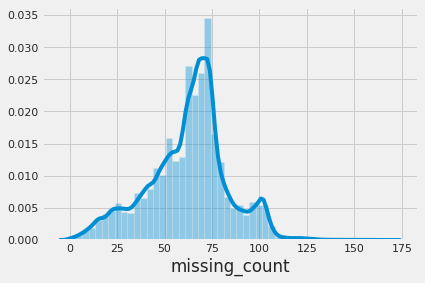

In [0]:
df['missing_count']=df.isnull().sum(axis =1)
sns.distplot(df.missing_count, kde = True)

In [0]:
df.missing_count.describe()

count   91713.0
mean    62.6   
std     21.2   
min     0.0    
25%     51.0   
50%     65.0   
75%     74.0   
max     169.0  
Name: missing_count, dtype: float64

In [0]:
df.head(2)

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count
0,25312,118,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,0,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,60
1,59342,81,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,0,70.2,nan,108.0,203.0,0,0.0,nan,9.0,0.

In [0]:
print('Missing >= 60 features: {} patients'.format(df[df['missing_count']>=60].shape[0]))

Missing >= 60 features: 57604 patients


In [0]:
### Check how number of missing values by patients affects death_rate
def death_rate(threshold):
  x = []
  y = []
  z = []
  t = []
  w = []
  for i in range(0,threshold,10):
    i1 = df[df['missing_count']<=i].groupby('hospital_death').count()['hospital_id'][0]
    x.append(i1)
    i2 = df[df['missing_count']<=i].groupby('hospital_death').count()['hospital_id'][1]
    y.append(i2)
    z.append(round(i2/(i1+i2)*100,2))
    t.append(i)
    w.append(i1+i2)
  print('total_no_features:', df.shape[1])
  return pd.DataFrame(np.column_stack([t,w,x,y,z]), columns=['no_missingFeatures', 'total_patients','survived', 'death', 'death_rate'])

In [0]:
death_rate(120)

total_no_features: 186


,no_missingFeatures,total_patients,survived,death,death_rate
0,0.0,25.0,14.0,11.0,44.0
1,10.0,882.0,681.0,201.0,22.8
2,20.0,3673.0,3004.0,669.0,18.2
3,30.0,8196.0,6944.0,1252.0,15.3
4,40.0,13790.0,11688.0,2102.0,15.2
5,50.0,22863.0,19432.0,3431.0,15.0
6,60.0,35578.0,30762.0,4816.0,13.5
7,70.0,58977.0,52744.0,6233.0,10.6
8,80.0,77748.0,70732.0,7016.0,9.0
9,90.0,83446.0,76116.0,7330.0,8.8


__Patients who have higher number of features >> higher chance of death. This may suggests at the time od admission, physicians believe those patients' situations are more severed.__

____
__NOTES: MICE IMPUTER CAN ONLY USED TO IMPUTE CONITUNOUS VARIABLE__

___
#### 1.1 AGE | HEIGHT | WEIGHT

Using apache4a_prob to impute together
___

In [0]:
# Check data for missing value before impute
df[['age', 'height', 'weight']].isnull().sum()

In [0]:
# Initialize IterativeImputer
mice_impute = IterativeImputer()

df[['age', 'height', 'weight', ]] = mice_impute.fit_transform(df[['age', 'height', 'weight']])

In [0]:
# Check data for missing value
df[['age', 'height', 'weight'].isnull().sum()

In [0]:
# Since mice imputer impute a float value >> round age.
df[['age']] = round(df[['age']],0)

___
#### 1.2 ETHNICITY
___

In [0]:
def check_col(col):
  print('Count by values:',df.groupby(col).count()['hospital_death'])
  print('----'*15)
  print('Missing values:',df[col].isnull().sum())
  print('----'*15)
  print('Unique values:',df[col].unique().tolist())

In [0]:
col='ethnicity'
check_col(col)

Count by values: ethnicity
African American    9547 
Asian               1129 
Caucasian           70684
Hispanic            3796 
Native American     788  
Other/Unknown       4374 
Name: hospital_death, dtype: int64
------------------------------------------------------------
Missing values: 1395
------------------------------------------------------------
Unique values: ['Caucasian', nan, 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']


In [0]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df[['ethnicity']] = imp.fit_transform(df[['ethnicity']])

In [0]:
check_col(col)

Count by values: ethnicity
African American    9547 
Asian               1129 
Caucasian           72079
Hispanic            3796 
Native American     788  
Other/Unknown       4374 
Name: hospital_death, dtype: int64
------------------------------------------------------------
Missing values: 0
------------------------------------------------------------
Unique values: ['Caucasian', 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']


#### 1.3 BMI

In [0]:
# Calculate bmi
df['bmi_cal'] = (df['weight']*10000)/(df['height']*df['height'])
df[['bmi', 'bmi_cal', 'weight', 'height']].head(10)

,bmi,bmi_cal,weight,height
0,22.7,22.7,73.9,180.3
1,27.4,27.4,70.2,160.0
2,31.9,32.0,95.3,172.7
3,22.6,22.6,61.7,165.1
4,nan,30.1,106.5,188.0
5,27.6,27.6,100.0,190.5
6,57.5,57.5,156.6,165.1
7,nan,29.0,79.0,165.0
8,nan,30.0,87.0,170.2
9,25.7,25.7,79.0,175.3


In [0]:
# Fill in na with bmi_cal
df['bmi'] = df['bmi'].fillna(df['bmi_cal'])
df[['bmi', 'bmi_cal', 'weight', 'height']].head(10)

,bmi,bmi_cal,weight,height
0,22.7,22.7,73.9,180.3
1,27.4,27.4,70.2,160.0
2,31.9,32.0,95.3,172.7
3,22.6,22.6,61.7,165.1
4,30.1,30.1,106.5,188.0
5,27.6,27.6,100.0,190.5
6,57.5,57.5,156.6,165.1
7,29.0,29.0,79.0,165.0
8,30.0,30.0,87.0,170.2
9,25.7,25.7,79.0,175.3


In [0]:
df[['bmi']] = round(df[['bmi']],1)
df[['bmi']].isnull().sum()

bmi    0
dtype: int64

___
#### 1.4 HOSPITAL_ADMIT_SOURCE & ICU_ADMIT_SOURCE

group by mode >> impute
most frequent | top 4 ( decide later)
___

In [0]:
df[['icu_admit_source','hospital_admit_source']][:30]

,icu_admit_source,hospital_admit_source
0,Floor,Floor
1,Floor,Floor
2,Accident & Emergency,Emergency Department
3,Operating Room / Recovery,Operating Room
4,Accident & Emergency,NaN
5,Accident & Emergency,Direct Admit
6,Accident & Emergency,Operating Room
7,Accident & Emergency,Emergency Department
8,Other Hospital,Other Hospital
9,Accident & Emergency,Direct Admit


In [0]:
def check_admit_source(df):
  i = []
  i.append(df.hospital_admit_source.isnull().sum())
  i.append(df.icu_admit_source.isnull().sum())
  i.append(df[df.hospital_admit_source.isnull()].icu_admit_source.isnull().sum())
  j = ['hospital_missing', 'icu_missing', 'both_missing_together']
  return pd.DataFrame(i, j)

check_admit_source(df)

,0
hospital_missing,21409
icu_missing,112
both_missing_together,111


__Strategy: using icu to impute hospital__

Recheck profile of those who are missing both icu and hospital admit_source

In [0]:
# impute based on group by mode
def fast_mode(df, key_cols, value_col):
    """ 
    Calculate a column mode, by group, ignoring null values. 

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame over which to calcualate the mode. 
    key_cols : list of str
        Columns to groupby for calculation of mode.
    value_col : str
        Column for which to calculate the mode. 

    Return
    ------ 
    pandas.DataFrame
        One row for the mode of value_col per key_cols group. If ties, 
        returns the one which is sorted first. 
    """
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')

In [0]:
df.loc[df.hospital_admit_source.isnull(), 'hospital_admit_source'] = df.icu_admit_source.map(fast_mode(df, ['icu_admit_source'], 'hospital_admit_source').set_index('icu_admit_source').hospital_admit_source)

In [0]:
df.loc[(df.icu_admit_source.isnull())&(df.hospital_admit_source.notnull()) , 'icu_admit_source'] = 'Operating Room / Recovery'

In [0]:
check_admit_source(df)

,0
hospital_missing,111
icu_missing,111
both_missing_together,111


In [0]:
df[(df.hospital_admit_source.isnull()) & (df.icu_admit_source.isnull()) & df.apache_3j_bodysystem.isnull()].shape[0]

15

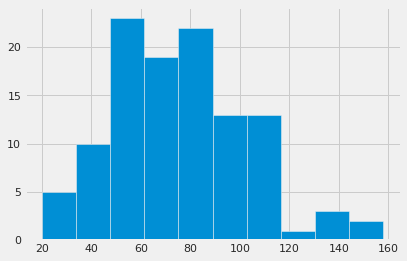

In [0]:
df[(df.hospital_admit_source.isnull()) & (df.icu_admit_source.isnull())].missing_count.hist()

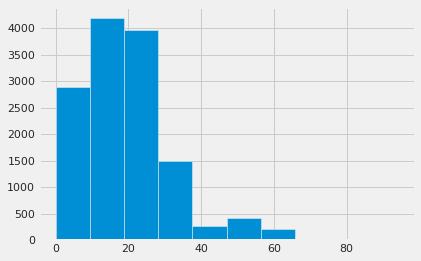

In [0]:
df[df['hospital_admit_source']== 'Operating Room'].missing_count.hist()

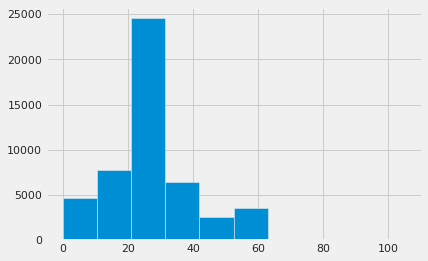

In [0]:
df[df['hospital_admit_source']== 'Emergency Department'].missing_count.hist()

In [0]:
Counter(df[df['missing_count']>60]['hospital_admit_source'])

Counter({'Acute Care/Floor': 19,
         'Chest Pain Center': 1,
         'Direct Admit': 53,
         'Emergency Department': 458,
         'Floor': 109,
         'Operating Room': 66,
         'Other Hospital': 6,
         'Other ICU': 3,
         'PACU': 5,
         'Recovery Room': 15,
         'Step-Down Unit (SDU)': 8,
         nan: 13})

__NOTES: Gynecological, Musculoskeletal/Skin : are the only two departments have the most frequent icu_admit_source: Operating room, the rest: emergency room.__

In [0]:
df[(df.icu_admit_source.isnull())&(df.hospital_admit_source.isnull())].apache_3j_bodysystem.unique()

array([nan, 'Cardiovascular', 'Sepsis', 'Respiratory', 'Trauma',
       'Metabolic', 'Gastrointestinal', 'Genitourinary', 'Neurological'],
      dtype=object)

In [0]:
pd.DataFrame(df.groupby(['apache_3j_bodysystem', 'hospital_admit_source'])['icu_admit_source'].count())

icu_admit_source
apache_3j_bodysystem hospital_admit_source                  
Cardiovascular       Acute Care/Floor       672             
                     Chest Pain Center      107             
                     Direct Admit           2579            
                     Emergency Department   13075           
                     Floor                  3828            
                     ICU                    11              
                     ICU to SDU             22              
                     Observation            6               
                     Operating Room         7435            
                     Other                  4               
                     Other Hospital         766             
                     Other ICU              58              
                     PACU                   221             
                     Recovery Room          835             
                     Step-Down Unit (SDU)   341             
Gastrointestinal     Acute Care/Floor       184             
                     Chest Pain Center      5               
                     Direct Admit           419             
                     Emergency Department   4142            
                     Floor                  1112            
                     ICU                    3               
                     ICU to SDU             9               
                     Observation            2               
                     Operating Room         2044            
                     Other Hospital         205             
                     Other ICU              18              
                     PACU                   198             
                     Recovery Room          583             
                     Step-Down Unit (SDU)   92              
Genitourinary        Acute Care/Floor       42              
                     Direct Admit           147             
                     Emergency Department   1082            
                     Floor                  362             
                     ICU                    1               
                     Operating Room         308             
                     Other Hospital         42              
                     Other ICU              9               
                     PACU                   41              
                     Recovery Room          115             
                     Step-Down Unit (SDU)   19              
Gynecological        Acute Care/Floor       4               
                     Direct Admit           4               
                     Emergency Department   12              
                     Floor                  35              
                     Operating Room         150             
                     Other Hospital         1               
                     PACU                   11              
                     Recovery Room          94              
                     Step-Down Unit (SDU)   2               
Hematological        Acute Care/Floor       19              
                     Chest Pain Center      1               
                     Direct Admit           42              
                     Emergency Department   419             
                     Floor                  119             
                     Operating Room         12              
                     Other                  1               
                     Other Hospital         16              
                     Other ICU              1               
                     PACU                   1               
                     Recovery Room          3               
                     Step-Down Unit (SDU)   4               
Metabolic            Acute Care/Floor       97              
                     Direct Admit           364             
                     Emergency Department   6308            
                  

In [0]:
from collections import Counter
Counter(df[(df.icu_admit_source.isnull())&(df.hospital_admit_source.isnull())]['icu_type'])

Counter({'CCU-CTICU': 4,
         'CTICU': 8,
         'Cardiac ICU': 13,
         'MICU': 4,
         'Med-Surg ICU': 71,
         'Neuro ICU': 6,
         'SICU': 5})

In [0]:
Counter(df['icu_type'])

Counter({'CCU-CTICU': 7156,
         'CSICU': 4613,
         'CTICU': 4003,
         'Cardiac ICU': 4776,
         'MICU': 7695,
         'Med-Surg ICU': 50586,
         'Neuro ICU': 7675,
         'SICU': 5209})

In [0]:
Counter(df['icu_admit_source'])

Counter({'Accident & Emergency': 54060,
         'Floor': 15611,
         'Operating Room / Recovery': 18714,
         'Other Hospital': 2358,
         'Other ICU': 859,
         nan: 111})

In [0]:
Counter(df['hospital_admit_source'])

Counter({'Acute Care/Floor': 1910,
         'Chest Pain Center': 134,
         'Direct Admit': 6441,
         'Emergency Department': 49804,
         'Floor': 12170,
         'ICU': 35,
         'ICU to SDU': 45,
         'Observation': 10,
         'Operating Room': 13457,
         'Other': 7,
         'Other Hospital': 2312,
         'Other ICU': 233,
         'PACU': 1017,
         'Recovery Room': 2896,
         'Step-Down Unit (SDU)': 1131,
         nan: 111})

___
__Impute Missing for both icu_admit_source and hospital_admit_source with most frequent.__
___

In [0]:
df.loc[(df.icu_admit_source.isnull())&(df.hospital_admit_source.isnull()) , 'icu_admit_source'] = 'Accident & Emergency'
df.loc[df.hospital_admit_source.isnull() , 'hospital_admit_source'] = 'Emergency Department'

check_admit_source(df)

,0
hospital_missing,0
icu_missing,0
both_missing_together,0


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_0308.csv')

___
### II. IMPUTE APACHE_GROUPING
___

In [0]:
apache_grouping_col = ['aids', 'cirrhosis', 'diabetes_mellitus', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem']
def check_apache_grouping(apache_grouping_col):
    l = []
    for i in apache_grouping_col:
        l.append(df[[i]].isnull().sum()[0])
    return pd.DataFrame(l,apache_grouping_col)

check_apache_grouping(apache_grouping_col)

,0
aids,715
cirrhosis,715
diabetes_mellitus,715
immunosuppression,715
leukemia,715
lymphoma,715
solid_tumor_with_metastasis,715
apache_3j_bodysystem,1662


In [0]:
df[df['aids'].isnull()]['apache_3j_bodysystem'].unique()

array([nan], dtype=object)

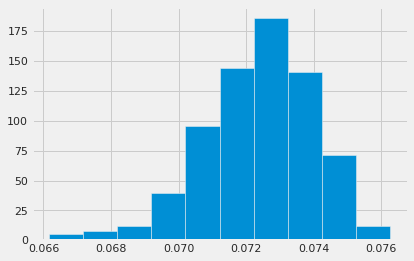

In [0]:
df[df['aids'].isnull()]['apache_4a_icu_death_prob'].hist()

In [0]:
Counter(df[df['aids'].isnull()]['hospital_death'])

Counter({0: 630, 1: 85})

__All the apache_grouping columns are missing togerther >> fill na by 0 (N) based on ANZICS CORE dictionary also)__

In [0]:
fillna_col_ap = ['aids', 'cirrhosis', 'diabetes_mellitus', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
df[fillna_col_ap] = df[fillna_col_ap].replace(np.nan, 0)

In [0]:
check_apache_grouping(fillna_col_ap)

,0
aids,0
cirrhosis,0
diabetes_mellitus,0
immunosuppression,0
leukemia,0
lymphoma,0
solid_tumor_with_metastasis,0


_____
#### 2.1 Add-in col: Number of disease/ patient

In [0]:
df['num_disease'] = df.iloc[:,111:119].sum(axis = 1)
df['num_disease'].describe()

count   91713.0
mean    80.7   
std     34.3   
min     0.0    
25%     72.8   
50%     88.8   
75%     102.6  
max     172.1  
Name: num_disease, dtype: float64

In [0]:
Counter(df[(df['num_disease'] == 0)]['apache_3j_bodysystem'])

Counter({'Cardiovascular': 3394,
         'Gastrointestinal': 220,
         'Genitourinary': 144,
         'Gynecological': 2,
         'Hematological': 18,
         'Metabolic': 1468,
         'Musculoskeletal/Skin': 89,
         'Neurological': 1765,
         'Respiratory': 1079,
         'Sepsis': 561,
         'Trauma': 376,
         nan: 291})

In [0]:
Counter(df[(df['num_disease'] == 0)]['apache_2_bodysystem'])

Counter({'Cardiovascular': 3939,
         'Gastrointestinal': 220,
         'Haematologic': 18,
         'Metabolic': 1468,
         'Neurologic': 1765,
         'Renal/Genitourinary': 146,
         'Respiratory': 1079,
         'Trauma': 376,
         'Undefined Diagnoses': 34,
         'Undefined diagnoses': 71,
         nan: 291})

___
#### 2.2 Impute Apache_3j_body_system

__Fillin na in `apache_3j_body_system` with 'Undefined'since they do not have post operative and there is no clear cut of how to define if they was diagnosis with any diease at time of admission__
___

In [0]:
fillna_col_3j = ['apache_3j_bodysystem']
df[fillna_col_3j] = df[fillna_col_3j].replace(np.nan, 'Undefined')
check_apache_grouping(fillna_col_3j)

,0
apache_3j_bodysystem,0


In [0]:
Counter(df['apache_3j_bodysystem'])

Counter({'Cardiovascular': 29999,
         'Gastrointestinal': 9026,
         'Genitourinary': 2172,
         'Gynecological': 313,
         'Hematological': 638,
         'Metabolic': 7650,
         'Musculoskeletal/Skin': 1166,
         'Neurological': 11896,
         'Respiratory': 11609,
         'Sepsis': 11740,
         'Trauma': 3842,
         'Undefined': 1662})

In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_0308.csv')

___
### III. VITALS

- Solved problem with max > min.

- For missing value, need to combine with other analysis and will create another dataset.
___

In [0]:
# Import data
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_0308.csv', index_col = 0)

___
#### 3.1 resprate

* d1_resprate_min | d1_resprate_max


IMPUTE WITH MEDIAN VALUES USING 'apache_3j_bodysystem'. Filter those who have 'Respiratory' problem

In [0]:
def max_min(col, col_view):
        print(df[col[0]].describe())
        print('--------'*15)
        print(df[col[1]].describe())
        print('--------'*15)
        return df[df[col[0]]> df[col[1]]][col_view]

##### d1

In [0]:
col_view = ['d1_resprate_min', 'd1_resprate_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_resprate_min', 'd1_resprate_max']

In [0]:
max_min(col, col_view)

count   91328.0
mean    12.8   
std     5.1    
min     0.0    
25%     10.0   
50%     13.0   
75%     16.0   
max     100.0  
Name: d1_resprate_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91328.0
mean    28.9   
std     10.7   
min     14.0   
25%     22.0   
50%     26.0   
75%     32.0   
max     92.0   
Name: d1_resprate_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_resprate_min,d1_resprate_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
52067,20.0,14.0,71.4,Respiratory,0,0.1
71776,96.0,92.0,109.6,Cardiovascular,0,0.0
72737,25.0,14.0,92.4,Trauma,0,0.0
73863,100.0,92.0,63.1,Musculoskeletal/Skin,0,0.0
81314,18.0,14.0,118.2,Sepsis,1,0.6


__Since the value of resprate_max are consistent: swap bt 2 col max and min, instead of replaced by nan and impute by median__

In [0]:
df['d1_resprate_min_copy'] = df['d1_resprate_min'].copy()
df['d1_resprate_max_copy'] = df['d1_resprate_max'].copy()
df[['d1_resprate_max','d1_resprate_max_copy', 'd1_resprate_min', 'd1_resprate_min_copy']][:5]

,d1_resprate_max,d1_resprate_max_copy,d1_resprate_min,d1_resprate_min_copy
0,34.0,34.0,10.0,10.0
1,32.0,32.0,12.0,12.0
2,21.0,21.0,8.0,8.0
3,23.0,23.0,7.0,7.0
4,18.0,18.0,16.0,16.0


In [0]:

for index, row in df.iterrows():
    if df.loc[index, 'd1_resprate_min'] > df.loc[index, 'd1_resprate_max'] :
        df.loc[index, 'd1_resprate_max'] = df.loc[index, 'd1_resprate_min_copy']
        df.loc[index, 'd1_resprate_min'] = df.loc[index, 'd1_resprate_max_copy']

In [0]:
df[df['d1_resprate_min']> df['d1_resprate_max']]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy


##### h1

In [0]:
col_view = ['h1_resprate_min', 'h1_resprate_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['h1_resprate_min', 'h1_resprate_max']

In [0]:
max_min(col, col_view)

count   87356.0
mean    17.2   
std     6.1    
min     0.0    
25%     14.0   
50%     16.0   
75%     20.0   
max     189.0  
Name: h1_resprate_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   87356.0
mean    22.6   
std     7.5    
min     10.0   
25%     18.0   
50%     21.0   
75%     26.0   
max     59.0   
Name: h1_resprate_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,h1_resprate_min,h1_resprate_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
307,72.0,59.0,96.0,Neurological,1,0.7
1654,67.0,59.0,126.2,Cardiovascular,0,0.1
2478,16.0,10.0,112.6,Cardiovascular,1,0.1
3430,90.0,59.0,98.1,Sepsis,1,0.1
4427,96.0,59.0,91.9,Sepsis,0,0.1
6434,66.0,59.0,68.9,Cardiovascular,0,0.1
6982,21.0,10.0,116.9,Sepsis,1,0.6
8432,99.0,59.0,73.8,Respiratory,0,0.2
8722,63.0,59.0,94.1,Sepsis,1,0.3
9324,68.0,59.0,99.7,Metabolic,0,0.0


In [0]:
df['h1_resprate_min_copy'] = df['h1_resprate_min'].copy()
df['h1_resprate_max_copy'] = df['h1_resprate_max'].copy()
df[['h1_resprate_max','h1_resprate_max_copy', 'h1_resprate_min', 'h1_resprate_min_copy']][:5]

,h1_resprate_max,h1_resprate_max_copy,h1_resprate_min,h1_resprate_min_copy
0,26.0,26.0,18.0,18.0
1,31.0,31.0,28.0,28.0
2,20.0,20.0,16.0,16.0
3,12.0,12.0,11.0,11.0
4,nan,nan,nan,nan


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'h1_resprate_min'] > df.loc[index, 'h1_resprate_max'] :
        df.loc[index, 'h1_resprate_max'] = df.loc[index, 'h1_resprate_min_copy']
        df.loc[index, 'h1_resprate_min'] = df.loc[index, 'h1_resprate_max_copy']

In [0]:
df[df['h1_resprate_min']> df['h1_resprate_max']]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


##### apache

In [0]:
print(df.loc[(df['d1_resprate_max'].isnull())&(df['resprate_apache'].isnull()==False)].shape)
print(df.loc[(df['d1_resprate_min'].isnull())&(df['resprate_apache'].isnull()==False)].shape)

(42, 192)
(42, 192)


In [0]:
df.loc[(df['d1_resprate_max'].isnull())&(df['resprate_apache'].isnull()==False),'d1_resprate_max']=df.loc[(df['d1_resprate_max'].isnull())&(df['resprate_apache'].isnull()==False),'resprate_apache']
df.loc[(df['d1_resprate_min'].isnull())&(df['resprate_apache'].isnull()==False),'d1_resprate_min']=df.loc[(df['d1_resprate_min'].isnull())&(df['resprate_apache'].isnull()==False),'resprate_apache']

In [0]:
print(df.loc[(df['d1_resprate_max'].isnull())&(df['h1_resprate_max'].isnull()==False)].shape)
print(df.loc[(df['d1_resprate_min'].isnull())&(df['h1_resprate_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


In [0]:
# Impute apache based min_max

In [0]:
print(df.loc[(df['resprate_apache'].isnull())&(df['d1_resprate_max'].isnull()==False)].shape)
print(df.loc[(df['resprate_apache'].isnull())&(df['d1_resprate_min'].isnull()==False)].shape)

(891, 192)
(891, 192)


In [0]:
df[(df['resprate_apache'].isnull())&(df['d1_resprate_min'].isnull()==False)][['d1_resprate_min', 'd1_resprate_max']].describe()

,d1_resprate_min,d1_resprate_max
count,891.0,891.0
mean,12.9,27.5
std,5.5,10.7
min,0.0,14.0
25%,10.0,20.0
50%,13.0,25.0
75%,16.0,31.0
max,66.0,92.0


In [0]:
df[(df['resprate_apache'].isnull())&(df['d1_resprate_min'].isnull()==False)][['d1_resprate_min', 'd1_resprate_max', 'resprate_apache']]

,d1_resprate_min,d1_resprate_max,resprate_apache
292,20.0,20.0,nan
350,10.0,35.0,nan
397,14.0,37.0,nan
419,16.0,18.0,nan
481,18.0,18.0,nan
...,...,...,...
91597,10.0,24.0,nan
91625,4.0,32.0,nan
91689,8.0,30.0,nan
91693,12.0,76.0,nan


In [0]:
col =[('d1_resprate_max', 'd1_resprate_min', 'resprate_apache')]
def impute_func(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]
                if df.loc[index, var[1]] <= 5:
                    df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_func(df, col)

In [0]:
df[(df['resprate_apache'].isnull())&(df['d1_resprate_min'].isnull()==False)]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


___
_ALL MISSING TOGETHER_

Normal range: 14 -24
___

In [0]:
print(df[df['resprate_apache'].isnull()].shape)
print(df[df['d1_resprate_min'].isnull()].shape)
print(df[df['d1_resprate_max'].isnull()].shape)

(343, 192)
(343, 192)
(343, 192)


In [0]:
df[(df['resprate_apache'].isnull())&(df['d1_resprate_min'].isnull())&(df['d1_resprate_max'].isnull())].shape

(343, 192)

#### 3.2 temperature

##### d1

In [0]:
col_view = ['d1_temp_min', 'd1_temp_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_temp_min', 'd1_temp_max']

In [0]:
max_min(col, col_view)

count   89389.0
mean    36.3   
std     0.7    
min     31.9   
25%     36.1   
50%     36.4   
75%     36.7   
max     37.8   
Name: d1_temp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   89389.0
mean    37.3   
std     0.7    
min     35.1   
25%     36.9   
50%     37.1   
75%     37.6   
max     39.9   
Name: d1_temp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_temp_min,d1_temp_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
346,36.8,35.1,121.0,Sepsis,0,0.0
470,35.6,35.1,102.3,Sepsis,0,0.3
1720,36.8,35.1,101.1,Sepsis,0,0.1
5881,36.4,35.1,99.2,Sepsis,0,0.1
8986,36.7,35.1,64.0,Sepsis,0,0.1
9134,37.2,35.1,111.2,Sepsis,0,0.3
9291,36.8,35.1,127.2,Neurological,1,0.8
9870,37.2,35.1,112.6,Sepsis,0,0.2
12360,36.6,35.1,0.0,Sepsis,0,0.0
14190,35.4,35.1,83.6,Sepsis,0,0.0


In [0]:
col = [('d1_temp_max', 'd1_temp_min')]
des_col = ['diff', 'd1_temp_max', 'd1_temp_min']
stat_minmax(col, des_col)

         diff  d1_temp_max  d1_temp_min
count 89328.0 89328.0      89328.0     
mean  1.0     37.3         36.3        
std   0.9     0.7          0.7         
min   0.0     35.1         31.9        
25%   0.5     36.9         36.1        
50%   0.8     37.1         36.4        
75%   1.3     37.6         36.6        
max   8.0     39.9         37.8        


diff                              d1_temp_max                                   d1_temp_min                                  
                       count mean std min 25% 50% 75% max       count mean std  min  25%  50%  75%  max       count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       29222.0 1.0  0.9 0.0 0.4 0.8 1.4 8.0 29222.0     37.2 0.7 35.1 36.8 37.1 37.5 39.9 29222.0     36.1 0.9 31.9 36.0 36.3 36.6 37.8
Gastrointestinal     8787.0  1.0  0.7 0.0 0.5 0.8 1.2 8.0 8787.0      37.3 0.6 35.1 36.9 37.2 37.6 39.9 8787.0      36.3 0.6 31.9 36.1 36.4 36.7 37.8
Genitourinary        2085.0  0.9  0.8 0.0 0.4 0.7 1.2 7.6 2085.0      37.2 0.7 35.1 36.8 37.1 37.4 39.9 2085.0      36.3 0.6 31.9 36.1 36.4 36.6 37.8
Gynecological        301.0   0.9  0.7 0.0 0.5 0.7 1.1 4.9 301.0       37.2 0.4 35.9 36.9 37.1 37.4 39.0 301.0       36.3 0.6 31.9 36.2 36.4 36.6 37.8
Hematological        612.0   1.0  0.8 0.0 0.5 0.8 1.3 5.9 612.0       37.4 0.7 35.6 36.9 37.2 37.7 39.9 612.0       36.4 0.6 31.9 36.2 36.5 36.7 37.8
Metabolic            7395.0  0.9  0.8 0.0 0.4 0.7 1.1 8.0 7395.0      37.2 0.6 35.1 36.8 37.1 37.4 39.9 7395.0      36.3 0.6 31.9 36.2 36.4 36.7 37.8
Musculoskeletal/Skin 1121.0  1.1  0.8 0.0 0.5 0.9 1.4 5.6 1121.0      37.4 0.7 35.3 36.9 37.2 37.7 39.9 1121.0      36.4 0.6 31.9 36.1 36.4 36.7 37.8
Neurological         11665.0 0.9  0.8 0.0 0.4 0.7 1.2 7.4 11665.0     37.3 0.6 35.1 36.9 37.1 37.6 39.9 11665.0     36.4 0.6 31.9 36.2 36.4 36.7 37.8
Respiratory          11290.0 1.0  0.8 0.0 0.5 0.8 1.3 7.9 11290.0     37.3 0.7 35.1 36.9 37.2 37.6 39.9 11290.0     36.3 0.6 31.9 36.1 36.4 36.7 37.8
Sepsis               11481.0 1.3  1.0 0.0 0.6 1.0 1.7 8.0 11481.0     37.6 0.9 35.1 36.9 37.3 38.1 39.9 11481.0     36.3 0.8 31.9 36.1 36.4 36.7 37.8
Trauma               3811.0  1.1  1.0 0.0 0.5 0.9 1.5 7.9 3811.0      37.4 0.7 35.1 37.0 37.3 37.8 39.9 3811.0      36.3 0.7 31.9 36.1 36.4 36.7 37.8
Undefined            1558.0  0.9  0.8 0.0 0.4 0.7 1.2 7.5 1558.0      37.3 0.6 35.1 36.9 37.1 37.6 39.9 1558.0      36.3 0.7 31.9 36.1 36.4 36.7 37.8

__Since max cols are consistent with 35.1 >> Replaced d1_temp_max = d1_temp_min + randit(range(min_std, max_std)). In this case, both max and min have the same std: 0.7__

In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'd1_temp_min'] > df.loc[index, 'd1_temp_max'] :
        df.loc[index, 'd1_temp_max'] = df.loc[index, 'd1_temp_min'] + 0.7

In [0]:
df[df['d1_temp_min'] > df['d1_temp_max']]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_temp_max'].isnull())&(df['h1_temp_max'].isnull()==False)].shape)
print(df.loc[(df['d1_temp_min'].isnull())&(df['h1_temp_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


##### apache

In [0]:
col =[('d1_temp_max', 'd1_temp_min', 'temp_apache')]
def check_apache(col):
    for i in col:
        var = i
        print('apache_max_missing:',df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())].shape)
        print('apache_min_missing',df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())].shape)

        ''' Replacing max min null values with apache score'''
        df.loc[(df[var[0]].isnull())&(df[var[2]].isnull()==False),var[0]]=df.loc[(df[var[0]].isnull())&(df[var[2]].isnull()==False),var[2]]
        df.loc[(df[var[1]].isnull())&(df[var[2]].isnull()==False),var[1]]=df.loc[(df[var[1]].isnull())&(df[var[2]].isnull()==False),var[2]]

In [0]:
check_apache(col)

apache_max_missing: (0, 192)
apache_min_missing (0, 192)


In [0]:
# Impute temperature apache based on min
def impute_temp_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_temp_apache(df, col)

In [0]:
df[(df['temp_apache'].isnull())&(df['d1_temp_min'].isnull()==False)]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


___
_ALL MISSING TOGETHER_ 

Normal range: 36 - 39.9
___




In [0]:
# Check missing together after imputing the data
def check_missing_together(col):
    for i in col:
        var = i
        print('apache_missing:',df[df[var[2]].isnull()].shape)
        print('min_missing:',df[df[var[1]].isnull()].shape)
        print('max_missing:',df[df[var[0]].isnull()].shape)
        print('all_missing:',df[(df[var[2]].isnull())&(df[var[1]].isnull())&(df[var[1]].isnull())].shape)

In [0]:
check_missing_together(col)

apache_missing: (2292, 192)
min_missing: (2292, 192)
max_missing: (2292, 192)
all_missing: (2292, 192)


#### 3.3 heartrate

##### d1

In [0]:
col_view = ['d1_heartrate_min', 'd1_heartrate_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_heartrate_min', 'd1_heartrate_max']

In [0]:
max_min(col, col_view)

count   91568.0
mean    70.3   
std     17.1   
min     0.0    
25%     60.0   
50%     69.0   
75%     81.0   
max     175.0  
Name: d1_heartrate_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91568.0
mean    103.0  
std     22.0   
min     58.0   
25%     87.0   
50%     101.0  
75%     116.0  
max     177.0  
Name: d1_heartrate_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_heartrate_min,d1_heartrate_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
10857,80.0,58.0,0.0,Cardiovascular,0,0.0
18989,68.0,58.0,99.0,Sepsis,0,0.0
20228,60.0,58.0,99.0,Cardiovascular,0,0.0
33490,64.0,58.0,82.8,Genitourinary,1,0.1
42163,62.0,58.0,1.6,Genitourinary,0,0.3
43422,90.0,58.0,71.4,Cardiovascular,0,0.0
49407,76.0,58.0,106.0,Cardiovascular,0,0.0
49813,105.0,58.0,135.4,Gastrointestinal,0,0.1
49838,114.0,58.0,110.1,Cardiovascular,0,0.6
54399,62.0,58.0,107.6,Cardiovascular,0,0.0


__Since max cols are consistent with 58 >> Replaced d1_heartrate_max = d1_heartrate_min + randit(range(min_std, max_std))__

In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'd1_heartrate_min'] > df.loc[index, 'd1_heartrate_max'] :
        df.loc[index, 'd1_heartrate_max'] = df.loc[index, 'd1_heartrate_min'] + randint(17, 22)

In [0]:
df[df['d1_heartrate_min'] > df['d1_heartrate_max']][col]

,d1_heartrate_min,d1_heartrate_max


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_heartrate_max'].isnull())&(df['h1_heartrate_max'].isnull()==False)].shape)
print(df.loc[(df['d1_heartrate_min'].isnull())&(df['h1_heartrate_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


##### apache

In [0]:
col =[('d1_heartrate_max', 'd1_heartrate_min', 'heart_rate_apache')]
check_apache(col)

apache_max_missing: (7, 192)
apache_min_missing (7, 192)


In [0]:
max_min(col, col_view)

count   91575.0
mean    70.3   
std     17.1   
min     0.0    
25%     60.0   
50%     69.0   
75%     81.0   
max     175.0  
Name: d1_heartrate_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91575.0
mean    103.0  
std     22.0   
min     58.0   
25%     87.0   
50%     101.0  
75%     116.0  
max     177.0  
Name: d1_heartrate_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_heartrate_min,d1_heartrate_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob


In [0]:
col =[('d1_heartrate_max', 'd1_heartrate_min', 'heart_rate_apache')]

# Impute temperature apache based on min
def impute_heart_rate_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]
                if (df.loc[index, var[0]] < 140) & (df.loc[index, var[1]] <= 39):
                    df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_heart_rate_apache(df, col)

_____
ALL MISSING TOGETHER

Normal range: 50 -99
___

In [0]:
check_missing_together(col)

apache_missing: (138, 192)
min_missing: (138, 192)
max_missing: (138, 192)
all_missing: (138, 192)


#### 3.4 spo2
* d1_spo2_min | d1_spo2_max

In [0]:
col_view = ['d1_spo2_min', 'd1_spo2_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_spo2_min', 'd1_spo2_max']

In [0]:
max_min(col, col_view)

count   91380.0
mean    90.5   
std     10.0   
min     0.0    
25%     89.0   
50%     92.0   
75%     95.0   
max     100.0  
Name: d1_spo2_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91380.0
mean    99.2   
std     1.8    
min     0.0    
25%     99.0   
50%     100.0  
75%     100.0  
max     100.0  
Name: d1_spo2_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_spo2_min,d1_spo2_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob


In [0]:
print('missing:', df[df['d1_spo2_min'].isnull() | df['d1_spo2_max'].isnull()][col_view].shape[0])
df[df['d1_spo2_min'].isnull() | df['d1_spo2_max'].isnull()][col_view][:20]

missing: 333


,d1_spo2_min,d1_spo2_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
3011,nan,nan,0.0,Undefined,0,0.1
8653,nan,nan,0.0,Sepsis,0,0.0
9143,nan,nan,0.0,Cardiovascular,0,0.1
9907,nan,nan,0.0,Sepsis,0,0.0
10486,nan,nan,0.0,Undefined,0,0.1
10711,nan,nan,0.0,Metabolic,0,0.1
11231,nan,nan,0.0,Cardiovascular,0,0.0
11306,nan,nan,0.0,Cardiovascular,0,0.1
11337,nan,nan,0.0,Cardiovascular,0,0.1
11909,nan,nan,1.0,Undefined,1,0.1


In [0]:
print(df.loc[(df['d1_spo2_max'].isnull())&(df['h1_spo2_max'].isnull()==False)].shape)
print(df.loc[(df['d1_spo2_min'].isnull())&(df['h1_spo2_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


___
#### 3.5 diasbp 

* d1_diasbp_max | d1_diasbp_min  ( replace max > min: nan >> impute)

IMPUTE WITH MEDIAN VALUES USING 'apache_3j_bodysystem'. Filter those who have 'Cardiovascular' problem. AND check range diff bt 1st two

##### d1

In [0]:
col_view = ['d1_diasbp_min', 'd1_diasbp_max', 'd1_diasbp_invasive_min', 'd1_diasbp_invasive_max', 'd1_diasbp_noninvasive_min', 'd1_diasbp_noninvasive_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_diasbp_min', 'd1_diasbp_max']

In [0]:
max_min(col, col_view)

count   91548.0
mean    50.2   
std     13.3   
min     13.0   
25%     42.0   
50%     50.0   
75%     58.0   
max     90.0   
Name: d1_diasbp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91548.0
mean    88.5   
std     19.8   
min     46.0   
25%     75.0   
50%     86.0   
75%     99.0   
max     165.0  
Name: d1_diasbp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_diasbp_min,d1_diasbp_max,d1_diasbp_invasive_min,d1_diasbp_invasive_max,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
32353,57.0,46.0,nan,nan,57.0,46.0,120.6,Neurological,0,0.1
35087,63.0,46.0,nan,nan,63.0,46.0,84.0,Respiratory,0,0.1
37558,53.0,46.0,53.0,165.0,nan,nan,99.5,Cardiovascular,0,0.1
43699,55.0,46.0,nan,nan,55.0,46.0,111.6,Musculoskeletal/Skin,0,0.0
48441,52.0,46.0,nan,nan,52.0,46.0,87.0,Respiratory,0,0.0
55090,55.0,46.0,nan,nan,55.0,46.0,119.0,Cardiovascular,0,0.0
55189,77.0,46.0,nan,nan,77.0,46.0,0.0,Neurological,0,0.0
56924,50.0,46.0,nan,nan,50.0,46.0,0.0,Cardiovascular,0,0.0
61651,51.0,46.0,nan,nan,51.0,46.0,112.1,Respiratory,0,0.0
61705,82.0,46.0,nan,nan,82.0,46.0,101.3,Neurological,0,0.0


In [0]:
X = df[(df['d1_diasbp_min'].notnull()) & (df['d1_diasbp_max'].notnull()) &(df['d1_diasbp_max'] > df['d1_diasbp_min'])]
X['d1_diasbp_diff'] = X['d1_diasbp_max'] - X['d1_diasbp_min']
X[['d1_diasbp_diff', 'd1_diasbp_min', 'd1_diasbp_max']].describe()

,d1_diasbp_diff,d1_diasbp_min,d1_diasbp_max
count,89488.0,89488.0,89488.0
mean,39.2,49.8,89.0
std,21.8,13.1,19.7
min,1.0,13.0,46.0
25%,24.0,41.0,76.0
50%,36.0,50.0,87.0
75%,50.0,58.0,99.0
max,152.0,90.0,165.0


In [0]:
df[(df['d1_diasbp_min'].notnull()) & (df['d1_diasbp_max'].notnull())][col_view]

,d1_diasbp_min,d1_diasbp_max,d1_diasbp_invasive_min,d1_diasbp_invasive_max,d1_diasbp_noninvasive_min,d1_diasbp_noninvasive_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
0,37.0,68.0,32.0,46.0,37.0,68.0,74.9,Sepsis,0,0.1
1,31.0,95.0,nan,nan,31.0,95.0,105.0,Respiratory,0,0.3
2,48.0,88.0,nan,nan,48.0,88.0,0.0,Metabolic,0,0.0
3,42.0,48.0,30.0,62.0,42.0,48.0,83.1,Cardiovascular,0,0.0
4,57.0,99.0,nan,nan,57.0,99.0,0.0,Trauma,0,0.1
...,...,...,...,...,...,...,...,...,...,...
91708,44.0,104.0,nan,nan,44.0,104.0,106.6,Sepsis,0,0.1
91709,40.0,73.0,34.0,94.0,40.0,73.0,89.8,Sepsis,0,0.0
91710,49.0,77.0,nan,nan,49.0,77.0,96.6,Metabolic,0,0.0
91711,32.0,99.0,nan,nan,32.0,99.0,0.0,Respiratory,0,0.0


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'd1_diasbp_min'] > df.loc[index, 'd1_diasbp_max']:
        df.loc[index, 'd1_diasbp_max'] = df.loc[index, 'd1_diasbp_min'] + randint(22, 39)

In [0]:
df[df['d1_diasbp_min'] > df['d1_diasbp_max']]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_diasbp_max'].isnull())&(df['h1_diasbp_max'].isnull()==False)].shape)
print(df.loc[(df['d1_diasbp_min'].isnull())&(df['h1_diasbp_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


_____
#### 3.6 sysbp 

* d1_sysbp_max | d1_sysbp_min

##### d1

In [0]:
col_view = ['d1_sysbp_min', 'd1_sysbp_max', 'd1_sysbp_invasive_min', 'd1_sysbp_invasive_max', 'd1_sysbp_noninvasive_min', 'd1_sysbp_noninvasive_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_sysbp_min', 'd1_sysbp_max']

In [0]:
max_min(col, col_view)

count   91554.0
mean    96.9   
std     20.7   
min     41.0   
25%     83.0   
50%     96.0   
75%     110.0  
max     160.0  
Name: d1_sysbp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91554.0
mean    148.3  
std     25.7   
min     90.0   
25%     130.0  
50%     146.0  
75%     164.0  
max     232.0  
Name: d1_sysbp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_sysbp_min,d1_sysbp_max,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_min,d1_sysbp_noninvasive_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
2384,100.0,90.0,nan,nan,100.0,90.0,87.7,Gastrointestinal,0,0.0
5979,100.0,90.0,nan,nan,100.0,90.0,97.6,Metabolic,0,0.0
6237,101.0,90.0,nan,nan,101.0,90.0,103.4,Respiratory,0,0.0
6250,148.0,90.0,nan,nan,148.0,90.0,104.5,Undefined,1,0.1
13742,109.0,90.0,nan,nan,109.0,90.0,94.4,Cardiovascular,0,0.0
25136,157.0,90.0,154.0,213.0,157.0,90.0,91.0,Cardiovascular,0,0.0
34785,91.0,90.0,nan,nan,91.0,90.0,90.9,Respiratory,0,0.2
35341,94.0,90.0,nan,nan,94.0,90.0,108.4,Respiratory,0,0.1
42859,96.0,90.0,nan,nan,96.0,90.0,112.0,Respiratory,0,0.1
45393,105.0,90.0,nan,nan,105.0,90.0,103.4,Respiratory,0,0.1


In [0]:
X = df[(df['d1_sysbp_min'].notnull()) & (df['d1_sysbp_max'].notnull()) &(df['d1_sysbp_max'] > df['d1_sysbp_min'])]
X['d1_sysbp_diff'] = X['d1_sysbp_max'] - X['d1_sysbp_min']
X[['d1_sysbp_diff', 'd1_sysbp_min', 'd1_sysbp_max']].describe()

,d1_sysbp_diff,d1_sysbp_min,d1_sysbp_max
count,89530.0,89530.0,89530.0
mean,52.6,96.4,148.9
std,26.1,20.4,25.6
min,1.0,41.0,90.0
25%,35.0,83.0,131.0
50%,49.0,95.0,146.0
75%,67.0,109.0,165.0
max,191.0,160.0,232.0


In [0]:
df[(df['d1_sysbp_min'].notnull()) & (df['d1_sysbp_max'].notnull())][col_view]

,d1_sysbp_min,d1_sysbp_max,d1_sysbp_invasive_min,d1_sysbp_invasive_max,d1_sysbp_noninvasive_min,d1_sysbp_noninvasive_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
0,73.0,131.0,64.0,122.0,73.0,131.0,74.9,Sepsis,0,0.1
1,67.0,159.0,nan,nan,67.0,159.0,105.0,Respiratory,0,0.3
2,105.0,148.0,nan,nan,105.0,148.0,0.0,Metabolic,0,0.0
3,84.0,158.0,78.0,164.0,84.0,158.0,83.1,Cardiovascular,0,0.0
4,120.0,147.0,nan,nan,120.0,147.0,0.0,Trauma,0,0.1
...,...,...,...,...,...,...,...,...,...,...
91708,67.0,128.0,nan,nan,67.0,128.0,106.6,Sepsis,0,0.1
91709,65.0,127.0,81.0,131.0,65.0,127.0,89.8,Sepsis,0,0.0
91710,75.0,110.0,nan,nan,75.0,110.0,96.6,Metabolic,0,0.0
91711,111.0,153.0,nan,nan,111.0,153.0,0.0,Respiratory,0,0.0


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'd1_sysbp_min'] > df.loc[index, 'd1_sysbp_max']:
        df.loc[index, 'd1_sysbp_max'] = df.loc[index, 'd1_sysbp_min'] + randint(26, 52)

In [0]:
df[df['d1_sysbp_min'] > df['d1_sysbp_max']]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_sysbp_max'].isnull())&(df['h1_sysbp_max'].isnull()==False)].shape)
print(df.loc[(df['d1_sysbp_min'].isnull())&(df['h1_sysbp_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


___
#### 3.7 mbp

* d1_mbp_max | d1_mbp_min

##### d1

In [0]:
col_view = ['d1_mbp_min', 'd1_mbp_max', 'd1_mbp_invasive_min', 'd1_mbp_invasive_max', 'd1_mbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'num_disease', 'apache_3j_bodysystem', 'hospital_death', 'apache_4a_icu_death_prob']
col = ['d1_mbp_min', 'd1_mbp_max']

In [0]:
max_min(col, col_view)

count   91493.0
mean    64.9   
std     15.7   
min     22.0   
25%     55.0   
50%     64.0   
75%     75.0   
max     112.0  
Name: d1_mbp_min, dtype: float64
------------------------------------------------------------------------------------------------------------------------
count   91493.0
mean    104.7  
std     20.8   
min     60.0   
25%     90.0   
50%     102.0  
75%     116.0  
max     184.0  
Name: d1_mbp_max, dtype: float64
------------------------------------------------------------------------------------------------------------------------


,d1_mbp_min,d1_mbp_max,d1_mbp_invasive_min,d1_mbp_invasive_max,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
3422,103.0,60.0,nan,nan,103.0,181.0,73.0,Cardiovascular,0,0.0
5068,72.0,60.0,56.0,148.0,72.0,181.0,63.0,Neurological,1,0.2
13489,73.0,60.0,nan,nan,73.0,181.0,110.8,Neurological,0,0.1
24570,85.0,60.0,nan,nan,85.0,181.0,0.0,Cardiovascular,0,0.1
32110,68.0,60.0,nan,nan,68.0,181.0,0.0,Cardiovascular,0,0.0
42734,67.0,60.0,80.0,116.0,67.0,181.0,132.5,Cardiovascular,0,0.4
51564,85.0,60.0,nan,nan,85.0,181.0,100.7,Metabolic,0,0.0
91601,69.0,60.0,nan,nan,69.0,181.0,0.0,Trauma,0,0.0
91689,77.0,60.0,nan,nan,77.0,181.0,98.0,Undefined,0,0.1


In [0]:
X = df[(df['d1_mbp_min'].notnull()) & (df['d1_mbp_max'].notnull()) &(df['d1_mbp_max'] > df['d1_mbp_min'])]
X['d1_mbp_diff'] = X['d1_mbp_max'] - X['d1_mbp_min']
print(X[['d1_mbp_diff', 'd1_mbp_min', 'd1_mbp_max']].describe())
X.groupby('apache_3j_bodysystem')[['d1_mbp_diff', 'd1_mbp_min', 'd1_mbp_max']].describe()

       d1_mbp_diff  d1_mbp_min  d1_mbp_max
count 89180.0      89180.0     89180.0    
mean  40.8         64.4        105.2      
std   22.1         15.4        20.7       
min   1.0          22.0        60.0       
25%   26.0         54.0        91.0       
50%   37.0         64.0        103.0      
75%   52.0         74.0        117.0      
max   162.0        112.0       184.0      


d1_mbp_diff                                    d1_mbp_min                                     d1_mbp_max                                       
                           count mean  std min  25%  50%  75%   max      count mean  std  min  25%  50%  75%   max      count  mean  std  min  25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                
Cardiovascular       28845.0     40.0 22.2 1.0 25.0 37.0 51.0 162.0 28845.0    64.7 15.4 22.0 55.0 64.0 74.0 112.0 28845.0    104.7 20.9 60.0 90.0 102.0 116.0 184.0
Gastrointestinal     8810.0      39.5 21.3 1.0 25.0 36.0 50.0 162.0 8810.0     63.2 15.5 22.0 53.0 62.0 73.0 112.0 8810.0     102.7 19.4 60.0 90.0 101.0 113.0 184.0
Genitourinary        2124.0      41.5 22.9 1.0 25.0 37.0 53.0 143.0 2124.0     63.2 15.9 22.0 52.0 62.0 73.0 112.0 2124.0     104.7 21.2 60.0 89.0 102.0 116.0 184.0
Gynecological        307.0       34.8 18.3 1.0 23.0 32.0 43.0 145.0 307.0      68.0 14.3 23.0 59.0 67.0 77.0 112.0 307.0      102.7 19.4 60.0 89.0 102.0 115.0 184.0
Hematological        623.0       37.5 21.1 1.0 23.0 34.0 47.5 142.0 623.0      63.3 15.3 25.0 53.0 63.0 73.0 112.0 623.0      100.8 19.7 60.0 87.0 98.0  112.0 184.0
Metabolic            7453.0      38.9 20.4 1.0 25.0 36.0 50.0 161.0 7453.0     67.4 14.9 22.0 58.0 67.0 77.0 112.0 7453.0     106.3 19.9 60.0 92.0 104.0 117.0 184.0
Musculoskeletal/Skin 1129.0      38.2 20.3 1.0 25.0 35.0 48.0 147.0 1129.0     62.3 14.2 22.0 53.0 62.0 71.0 112.0 1129.0     100.5 19.3 60.0 88.0 98.0  111.0 184.0
Neurological         11695.0     43.1 21.8 1.0 28.0 40.0 54.0 162.0 11695.0    68.9 15.0 22.0 59.0 68.0 78.0 112.0 11695.0    112.1 20.9 60.0 97.0 110.0 124.0 184.0
Respiratory          11326.0     41.6 22.1 1.0 26.0 38.0 53.0 162.0 11326.0    64.0 14.9 22.0 55.0 63.0 73.0 112.0 11326.0    105.6 20.1 60.0 92.0 103.0 116.0 184.0
Sepsis               11557.0     42.9 24.1 1.0 26.0 39.0 55.0 162.0 11557.0    57.8 14.7 22.0 49.0 57.0 66.0 112.0 11557.0    100.7 21.1 60.0 86.0 98.0  111.0 184.0
Trauma               3781.0      39.8 20.3 1.0 26.0 36.0 50.0 162.0 3781.0     65.9 14.1 22.0 57.0 66.0 75.0 112.0 3781.0     105.8 18.6 60.0 93.0 104.0 116.0 184.0
Undefined            1530.0      39.4 21.3 1.0 25.0 36.5 50.0 162.0 1530.0     66.4 15.7 22.0 57.0 66.0 76.0 112.0 1530.0     105.9 20.6 60.0 92.0 104.0 117.0 184.0

In [0]:
df[(df['d1_mbp_min'].notnull()) & (df['d1_mbp_max'].notnull())][col_view]

,d1_mbp_min,d1_mbp_max,d1_mbp_invasive_min,d1_mbp_invasive_max,d1_mbp_noninvasive_min,d1_mbp_noninvasive_max,num_disease,apache_3j_bodysystem,hospital_death,apache_4a_icu_death_prob
0,46.0,89.0,40.0,66.0,46.0,89.0,74.9,Sepsis,0,0.1
1,38.0,120.0,nan,nan,38.0,120.0,105.0,Respiratory,0,0.3
2,68.0,102.0,nan,nan,68.0,102.0,0.0,Metabolic,0,0.0
3,84.0,84.0,52.0,92.0,84.0,84.0,83.1,Cardiovascular,0,0.0
4,90.0,104.0,nan,nan,90.0,104.0,0.0,Trauma,0,0.1
...,...,...,...,...,...,...,...,...,...,...
91708,48.0,109.0,nan,nan,48.0,109.0,106.6,Sepsis,0,0.1
91709,47.0,82.0,30.0,166.0,47.0,82.0,89.8,Sepsis,0,0.0
91710,57.0,82.0,nan,nan,57.0,82.0,96.6,Metabolic,0,0.0
91711,54.0,108.0,nan,nan,54.0,108.0,0.0,Respiratory,0,0.0


In [0]:
for index, row in df.iterrows():
    if df.loc[index, 'd1_mbp_min'] > df.loc[index, 'd1_mbp_max']:
        df.loc[index, 'd1_mbp_max'] = df.loc[index, 'd1_mbp_min'] + randint(22, 41)

In [0]:
df[df['d1_mbp_min'] > df['d1_mbp_max']]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_mbp_max'].isnull())&(df['h1_mbp_max'].isnull()==False)].shape)
print(df.loc[(df['d1_mbp_min'].isnull())&(df['h1_mbp_min'].isnull()==False)].shape)

(0, 192)
(0, 192)


___
#### 3.8 Drop invasive, non_invasive cols
- diasbp
- mbp
- sysbp

In [0]:
print('Before dropping:', df.shape)
print('-----'*15)
drop_col = ['d1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 
            'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min',
            'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min']
df.drop(columns=drop_col, inplace= True)
print('After dropping:', df.shape)

Before dropping: (91713, 192)
---------------------------------------------------------------------------
After dropping: (91713, 180)


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_vital_0308.csv')

___
__NEED TO CHECK WHICH TESTS COME TOGETHER >> ONLY IMPUTE MISSING VALUES BASED ON THE TEST THAT ACTUALLY HAS MISSING VALUES. THE REST JUST PUT NA OR OTHERS!!!__
____


In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_vital_0308.csv', index_col = 0)
df.head(2)

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy
0,25312,118,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,0,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,60,22.7,74.9,10.0,34.0,18.0,26.0
1,59342,81,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,0,70.2,nan,108.0,203.0,0,0.0,nan,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,nan,nan,61.0,48.0,61.0,48.0,114.0,10

___
### IV. LABS

All of feature inside labs tests have the problem with min > max >> fix one by one. Dealing with nan later
___

In [0]:
lab_min_max_col =[('d1_albumin_max','d1_albumin_min'),
                 ('d1_bilirubin_max','d1_bilirubin_min'),
                 ('d1_bun_max','d1_bun_min'),
                 ('d1_calcium_max','d1_calcium_min'),
                 ('d1_creatinine_max','d1_creatinine_min'),
                 ('d1_glucose_max','d1_glucose_min'),
                 ('d1_hco3_max','d1_hco3_min'),
                 ('d1_hemaglobin_max','d1_hemaglobin_min'),
                 ('d1_hematocrit_max','d1_hematocrit_min'),
                 ('d1_inr_max','d1_inr_min'),
                 ('d1_lactate_max','d1_lactate_min'),
                 ('d1_platelets_max','d1_platelets_min'),
                 ('d1_potassium_max','d1_potassium_min'),
                 ('d1_sodium_max','d1_sodium_min'),
                 ('d1_wbc_max','d1_wbc_min')]

In [0]:
from IPython.display import display
min_max_prob = []
for i in lab_min_max_col:
  variables = i
  print(variables[0],variables[1])
  print(df[variables[0]].min(),df[variables[0]].max())
  print(df[variables[1]].min(),df[variables[1]].max())
  display(df.loc[df[variables[0]]<df[variables[1]],[variables[0],variables[1]]])
  min_max_prob +=df.loc[df[variables[0]]<df[variables[1]],'patient_id'].tolist()

d1_albumin_max d1_albumin_min
1.2 4.6
1.1 4.5


,d1_albumin_max,d1_albumin_min
1501,1.2,3.8
9178,1.2,4.5
10090,1.2,4.5
10219,1.2,4.5
10330,1.2,4.5
10376,1.2,4.5
10471,1.2,4.5
11044,1.2,4.5
11352,1.2,4.5
11753,1.2,4.5


d1_bilirubin_max d1_bilirubin_min
0.2 51.0
0.2 51.0


,d1_bilirubin_max,d1_bilirubin_min


d1_bun_max d1_bun_min
4.0 126.0
3.0 113.09


,d1_bun_max,d1_bun_min
5678,4.0,113.1
13466,4.0,113.1
17084,4.0,53.0
19002,4.0,76.0
23600,4.0,113.1
27544,4.0,83.0
31353,4.0,113.1
32944,4.0,113.1
41326,4.0,113.1
42972,4.0,88.0


d1_calcium_max d1_calcium_min
6.2 10.8
5.5 10.3


,d1_calcium_max,d1_calcium_min
157,6.2,10.3
2555,6.2,10.3
6132,6.2,10.3
10632,6.2,9.4
22075,6.2,8.9
25391,6.2,7.9
38118,6.2,10.3
39180,6.2,7.2
40602,6.2,9.8
41947,6.2,10.3


d1_creatinine_max d1_creatinine_min
0.34 11.11
0.3 9.9379


,d1_creatinine_max,d1_creatinine_min
40468,0.3,9.9


d1_glucose_max d1_glucose_min
73.0 611.0
33.0 288.0


,d1_glucose_max,d1_glucose_min
70303,73.0,125.0


d1_hco3_max d1_hco3_min
12.0 40.0
7.0 39.0


,d1_hco3_max,d1_hco3_min
86,12.0,39.0
348,12.0,33.0
1240,12.0,37.0
2384,12.0,39.0
2473,12.0,36.0
2686,12.0,39.0
4025,12.0,39.0
4228,12.0,39.0
4493,12.0,39.0
6533,12.0,39.0


d1_hemaglobin_max d1_hemaglobin_min
6.8 17.2
5.3 16.7


,d1_hemaglobin_max,d1_hemaglobin_min
2996,6.8,16.7
6004,6.8,16.2
8917,6.8,16.7
10132,6.8,16.7
15322,6.8,16.7
15573,6.8,16.7
15585,6.8,16.7
16266,6.8,16.7
19557,6.8,16.7
19564,6.8,16.7


d1_hematocrit_max d1_hematocrit_min
20.4 51.5
16.1 50.0


,d1_hematocrit_max,d1_hematocrit_min
16163,20.4,47.8
20227,20.4,48.6
30365,20.4,43.2
30958,20.4,47.8
31666,20.4,45.7
33064,20.4,49.7
41973,20.4,42.7
44394,20.4,50.0
44551,20.4,41.2
50750,20.4,50.0


d1_inr_max d1_inr_min
0.9 7.756
0.9 6.127000000000002


,d1_inr_max,d1_inr_min


d1_lactate_max d1_lactate_min
0.4 19.8
0.4 15.1


,d1_lactate_max,d1_lactate_min
22229,0.4,10.0
51937,0.4,15.1
52066,0.4,12.7
69520,0.4,15.1


d1_platelets_max d1_platelets_min
27.0 585.0
18.55 557.45


,d1_platelets_max,d1_platelets_min
31594,27.0,509.0
49631,27.0,557.5
51917,27.0,557.5
72897,27.0,557.5


d1_potassium_max d1_potassium_min
2.8 7.0
2.4 5.8


,d1_potassium_max,d1_potassium_min
4766,2.8,4.6
5204,2.8,4.2
5857,2.8,4.1
6039,2.8,3.9
6543,2.8,5.8
6934,2.8,5.1
8445,2.8,5.8
8810,2.8,3.6
8965,2.8,4.4
9389,2.8,3.2


d1_sodium_max d1_sodium_min
123.0 158.0
117.0 153.0


,d1_sodium_max,d1_sodium_min
5110,123.0,153.0
5418,123.0,152.0
7450,123.0,151.0
11608,123.0,153.0
13067,123.0,153.0
13072,123.0,153.0
14326,123.0,153.0
14341,123.0,153.0
15457,123.0,153.0
16570,123.0,153.0


d1_wbc_max d1_wbc_min
1.2 46.08
0.9 40.898


,d1_wbc_max,d1_wbc_min


___
#### 4.1 albumin

d1_albumin_max | d1_albumin_min

In [0]:
def stat_minmax(col, des_col):
    for i in col:
        var = i
        X = df[(df[var[0]].notnull()) & (df[var[1]].notnull()) &(df[var[0]] >= df[var[1]])]
        X['diff'] = X[var[0]] - X[var[1]]
        print(X[des_col].describe())
        return X.groupby('apache_3j_bodysystem')[des_col].describe()

In [0]:
def impute_lab(low, high, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if df.loc[index, var[1]] > df.loc[index, var[0]]:
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low, high)

##### d1

In [0]:
col = [('d1_albumin_max', 'd1_albumin_min')]
des_col = ['diff', 'd1_albumin_max', 'd1_albumin_min']
stat_minmax(col, des_col)

         diff  d1_albumin_max  d1_albumin_min
count 42532.0 42532.0         42532.0        
mean  0.1     3.0             2.9            
std   0.2     0.7             0.7            
min   0.0     1.2             1.1            
25%   0.0     2.5             2.4            
50%   0.0     3.0             2.9            
75%   0.0     3.4             3.4            
max   3.5     4.6             4.5            


diff                              d1_albumin_max                              d1_albumin_min                             
                       count mean std min 25% 50% 75% max          count mean std min 25% 50% 75% max          count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                             
Cardiovascular       11680.0 0.1  0.3 0.0 0.0 0.0 0.0 3.5 11680.0        3.2  0.6 1.2 2.8 3.2 3.6 4.6 11680.0        3.1  0.6 1.1 2.7 3.1 3.5 4.5
Gastrointestinal     5227.0  0.1  0.2 0.0 0.0 0.0 0.0 3.5 5227.0         2.7  0.6 1.2 2.2 2.7 3.1 4.6 5227.0         2.6  0.6 1.1 2.2 2.6 3.0 4.5
Genitourinary        1273.0  0.1  0.2 0.0 0.0 0.0 0.1 3.4 1273.0         2.9  0.6 1.2 2.4 2.9 3.3 4.6 1273.0         2.8  0.6 1.1 2.3 2.8 3.2 4.5
Gynecological        178.0   0.1  0.2 0.0 0.0 0.0 0.1 1.5 178.0          2.4  0.6 1.2 2.0 2.3 2.9 4.3 178.0          2.3  0.6 1.1 1.9 2.2 2.7 4.3
Hematological        343.0   0.1  0.2 0.0 0.0 0.0 0.0 1.5 343.0          2.9  0.6 1.2 2.4 2.9 3.2 4.3 343.0          2.8  0.6 1.2 2.4 2.8 3.2 4.3
Metabolic            4037.0  0.1  0.3 0.0 0.0 0.0 0.0 3.4 4037.0         3.3  0.6 1.2 2.9 3.3 3.7 4.6 4037.0         3.2  0.6 1.1 2.8 3.2 3.6 4.5
Musculoskeletal/Skin 511.0   0.1  0.2 0.0 0.0 0.0 0.0 3.4 511.0          2.6  0.7 1.2 2.1 2.6 3.1 4.6 511.0          2.5  0.7 1.1 2.0 2.6 3.0 4.5
Neurological         4563.0  0.1  0.3 0.0 0.0 0.0 0.0 3.5 4563.0         3.3  0.6 1.2 2.9 3.4 3.7 4.6 4563.0         3.2  0.6 1.1 2.9 3.3 3.7 4.5
Respiratory          5134.0  0.1  0.2 0.0 0.0 0.0 0.0 3.4 5134.0         2.9  0.6 1.2 2.5 2.9 3.4 4.6 5134.0         2.9  0.6 1.1 2.4 2.9 3.3 4.5
Sepsis               7485.0  0.1  0.2 0.0 0.0 0.0 0.0 3.4 7485.0         2.6  0.6 1.2 2.2 2.6 3.0 4.6 7485.0         2.5  0.6 1.1 2.1 2.5 2.9 4.5
Trauma               1504.0  0.1  0.3 0.0 0.0 0.0 0.0 3.4 1504.0         3.2  0.6 1.2 2.8 3.3 3.7 4.6 1504.0         3.2  0.6 1.1 2.8 3.2 3.6 4.5
Undefined            597.0   0.1  0.2 0.0 0.0 0.0 0.0 1.6 597.0          3.0  0.7 1.2 2.6 3.0 3.4 4.6 597.0          2.9  0.7 1.1 2.5 3.0 3.4 4.4

In [0]:
df[df['d1_albumin_max'] >= df['d1_albumin_min']][['d1_albumin_max','d1_albumin_min']]

,d1_albumin_max,d1_albumin_min
0,2.3,2.3
1,1.6,1.6
8,2.7,2.7
9,3.6,3.6
13,2.5,2.5
...,...,...
91705,3.5,3.2
91706,4.0,3.7
91707,2.5,2.5
91710,3.1,2.8


In [0]:
impute_lab(0, 0.2, col)

In [0]:
df[df['d1_albumin_min'] > df['d1_albumin_max']][['d1_albumin_max','d1_albumin_min']]

,d1_albumin_max,d1_albumin_min


##### h1

In [0]:
col = [('h1_albumin_max', 'h1_albumin_min')]
des_col = ['diff', 'h1_albumin_max', 'h1_albumin_min']
stat_minmax(col, des_col)

        diff  h1_albumin_max  h1_albumin_min
count 7889.0 7889.0          7889.0         
mean  0.0    3.0             3.0            
std   0.0    0.7             0.7            
min   0.0    1.1             1.1            
25%   0.0    2.5             2.5            
50%   0.0    3.1             3.1            
75%   0.0    3.6             3.6            
max   0.5    4.7             4.7            


diff                              h1_albumin_max                              h1_albumin_min                             
                      count mean std min 25% 50% 75% max          count mean std min 25% 50% 75% max          count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                            
Cardiovascular       2585.0 0.0  0.0 0.0 0.0 0.0 0.0 0.5 2585.0         3.1  0.7 1.1 2.7 3.1 3.6 4.7 2585.0         3.1  0.7 1.1 2.7 3.1 3.6 4.7
Gastrointestinal     962.0  0.0  0.0 0.0 0.0 0.0 0.0 0.3 962.0          2.7  0.7 1.1 2.2 2.7 3.2 4.6 962.0          2.7  0.7 1.1 2.2 2.7 3.2 4.6
Genitourinary        226.0  0.0  0.0 0.0 0.0 0.0 0.0 0.3 226.0          2.9  0.7 1.1 2.5 3.0 3.4 4.7 226.0          2.9  0.7 1.1 2.5 3.0 3.4 4.7
Gynecological        35.0   0.0  0.0 0.0 0.0 0.0 0.0 0.0 35.0           2.7  0.8 1.1 2.2 2.7 3.2 4.0 35.0           2.7  0.8 1.1 2.2 2.7 3.2 4.0
Hematological        67.0   0.0  0.0 0.0 0.0 0.0 0.0 0.0 67.0           2.8  0.7 1.4 2.2 2.9 3.1 4.3 67.0           2.8  0.7 1.4 2.2 2.9 3.1 4.3
Metabolic            699.0  0.0  0.0 0.0 0.0 0.0 0.0 0.2 699.0          3.4  0.7 1.1 3.1 3.5 3.9 4.7 699.0          3.4  0.7 1.1 3.1 3.5 3.9 4.7
Musculoskeletal/Skin 109.0  0.0  0.0 0.0 0.0 0.0 0.0 0.0 109.0          2.6  0.8 1.1 2.2 2.6 3.1 4.7 109.0          2.6  0.8 1.1 2.2 2.6 3.1 4.7
Neurological         739.0  0.0  0.0 0.0 0.0 0.0 0.0 0.4 739.0          3.4  0.7 1.1 3.0 3.5 3.9 4.7 739.0          3.4  0.7 1.1 3.0 3.5 3.9 4.7
Respiratory          875.0  0.0  0.0 0.0 0.0 0.0 0.0 0.3 875.0          3.0  0.7 1.1 2.6 3.1 3.5 4.7 875.0          3.0  0.7 1.1 2.6 3.1 3.5 4.7
Sepsis               1207.0 0.0  0.0 0.0 0.0 0.0 0.0 0.5 1207.0         2.7  0.7 1.1 2.2 2.7 3.1 4.6 1207.0         2.7  0.7 1.1 2.2 2.7 3.1 4.6
Trauma               296.0  0.0  0.0 0.0 0.0 0.0 0.0 0.1 296.0          3.3  0.7 1.1 2.8 3.3 3.9 4.7 296.0          3.3  0.7 1.1 2.8 3.3 3.9 4.7
Undefined            89.0   0.0  0.0 0.0 0.0 0.0 0.0 0.3 89.0           3.0  0.8 1.1 2.5 3.0 3.6 4.7 89.0           3.0  0.8 1.1 2.5 3.0 3.6 4.7

In [0]:
df[df['h1_albumin_min'] > df['h1_albumin_max']][['h1_albumin_max','h1_albumin_min']]

,h1_albumin_max,h1_albumin_min


In [0]:
print(df.loc[(df['d1_albumin_max'].isnull())&(df['h1_albumin_max'].isnull()==False)].shape)
print(df.loc[(df['d1_albumin_min'].isnull())&(df['h1_albumin_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_albumin_max', 'd1_albumin_min', 'albumin_apache')]
check_apache(col)

apache_max_missing: (868, 180)
apache_min_missing (868, 180)


In [0]:
# Impute temperature apache based on min
def impute_albumin_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_albumin_apache(df, col)

___
ALL MISSING TOGETHER

Normal range: 25 - 44
___

In [0]:
check_missing_together(col)

apache_missing: (48228, 180)
min_missing: (48228, 180)
max_missing: (48228, 180)
all_missing: (48228, 180)


___
#### 4.2 bilirubin

d1_bilirubin_max | d1_bilirubin_min

##### d1

In [0]:
col = [('d1_bilirubin_max', 'd1_bilirubin_min')]
des_col = ['diff', 'd1_bilirubin_max', 'd1_bilirubin_min']
stat_minmax(col, des_col)

         diff  d1_bilirubin_max  d1_bilirubin_min
count 38040.0 38040.0           38040.0          
mean  0.1     1.1               1.1              
std   0.3     2.1               2.0              
min   0.0     0.2               0.2              
25%   0.0     0.4               0.4              
50%   0.0     0.6               0.6              
75%   0.0     1.1               1.0              
max   15.2    51.0              51.0             


diff                               d1_bilirubin_max                               d1_bilirubin_min                              
                       count mean std min 25% 50% 75%  max            count mean std min 25% 50% 75%  max            count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                                    
Cardiovascular       10395.0 0.1  0.3 0.0 0.0 0.0 0.0 10.4 10395.0          0.9  1.2 0.2 0.4 0.7 1.0 35.4 10395.0          0.9  1.1 0.2 0.4 0.6 0.9 35.4
Gastrointestinal     4766.0  0.1  0.6 0.0 0.0 0.0 0.0 12.9 4766.0           2.0  3.8 0.2 0.5 0.9 1.7 43.8 4766.0           1.9  3.6 0.2 0.5 0.8 1.6 40.1
Genitourinary        1037.0  0.1  0.2 0.0 0.0 0.0 0.0 2.8  1037.0           1.2  3.4 0.2 0.4 0.6 1.0 51.0 1037.0           1.2  3.3 0.2 0.3 0.5 0.9 51.0
Gynecological        162.0   0.1  0.3 0.0 0.0 0.0 0.1 1.5  162.0            0.9  1.1 0.2 0.4 0.6 1.0 12.2 162.0            0.7  1.0 0.2 0.3 0.5 0.8 11.5
Hematological        312.0   0.1  0.6 0.0 0.0 0.0 0.0 9.6  312.0            2.1  3.5 0.2 0.6 1.0 1.9 28.3 312.0            2.0  3.3 0.2 0.5 0.9 1.7 28.3
Metabolic            3573.0  0.0  0.2 0.0 0.0 0.0 0.0 7.4  3573.0           0.8  1.2 0.2 0.4 0.5 0.9 26.1 3573.0           0.8  1.1 0.2 0.3 0.5 0.8 26.1
Musculoskeletal/Skin 448.0   0.1  0.2 0.0 0.0 0.0 0.0 3.4  448.0            0.9  1.0 0.2 0.4 0.6 1.0 11.1 448.0            0.8  0.9 0.2 0.4 0.6 0.9 8.1 
Neurological         4088.0  0.0  0.1 0.0 0.0 0.0 0.0 6.0  4088.0           0.8  1.1 0.2 0.4 0.6 0.9 21.9 4088.0           0.8  1.1 0.2 0.4 0.6 0.8 21.9
Respiratory          4519.0  0.0  0.2 0.0 0.0 0.0 0.0 4.0  4519.0           0.8  1.4 0.2 0.4 0.5 0.9 34.6 4519.0           0.8  1.3 0.2 0.4 0.5 0.8 34.6
Sepsis               6788.0  0.1  0.4 0.0 0.0 0.0 0.0 15.2 6788.0           1.4  2.6 0.2 0.4 0.7 1.3 36.0 6788.0           1.3  2.4 0.2 0.4 0.7 1.2 33.4
Trauma               1420.0  0.1  0.3 0.0 0.0 0.0 0.0 5.4  1420.0           0.8  0.8 0.2 0.4 0.7 1.0 9.7  1420.0           0.8  0.7 0.2 0.4 0.6 0.9 9.0 
Undefined            532.0   0.1  0.5 0.0 0.0 0.0 0.0 7.1  532.0            1.1  2.1 0.2 0.4 0.6 1.0 24.7 532.0            1.0  1.9 0.2 0.4 0.6 0.9 24.6

In [0]:
df[df['d1_bilirubin_max'] >= df['d1_bilirubin_min']][['d1_bilirubin_max','d1_bilirubin_min']]

,d1_bilirubin_max,d1_bilirubin_min
0,0.4,0.4
1,0.5,0.5
8,0.2,0.2
9,0.4,0.4
13,0.4,0.4
...,...,...
91703,0.5,0.5
91704,0.6,0.6
91706,0.8,0.8
91707,0.4,0.4


In [0]:
impute_lab(0, 0.3, col)

In [0]:
df[df['d1_bilirubin_min'] > df['d1_bilirubin_max']][['d1_bilirubin_max','d1_bilirubin_min']]

,d1_bilirubin_max,d1_bilirubin_min


##### h1

In [0]:
print(df.loc[(df['d1_bilirubin_max'].isnull())&(df['h1_bilirubin_max'].isnull()==False)].shape)
print(df.loc[(df['d1_bilirubin_min'].isnull())&(df['h1_bilirubin_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_bilirubin_max', 'd1_bilirubin_min', 'bilirubin_apache')]
check_apache(col)

apache_max_missing: (992, 180)
apache_min_missing (992, 180)


In [0]:
# Impute temperature apache based on min
def impute_bilirubin_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]

In [0]:
impute_bilirubin_apache(df, col)

___
ALL MISSING TOGETHER

Normal range: < 35
___

In [0]:
check_missing_together(col)

apache_missing: (52681, 180)
min_missing: (52681, 180)
max_missing: (52681, 180)
all_missing: (52681, 180)


___
#### 4.3 bun

d1_bun_max | d1_bun_min

##### d1

In [0]:
col = [('d1_bun_max', 'd1_bun_min')]
des_col = ['diff', 'd1_bun_max', 'd1_bun_min']
stat_minmax(col, des_col)

         diff  d1_bun_max  d1_bun_min
count 81178.0 81178.0     81178.0    
mean  1.9     25.7        23.7       
std   5.0     20.5        18.8       
min   0.0     4.0         3.0        
25%   0.0     13.0        12.0       
50%   0.0     19.0        18.0       
75%   2.0     31.0        29.0       
max   117.0   126.0       113.1      


diff                                 d1_bun_max                                    d1_bun_min                                   
                       count mean  std min 25% 50% 75%   max      count mean  std min  25%  50%  75%   max      count mean  std min  25%  50%  75%   max
apache_3j_bodysystem                                                                                                                                    
Cardiovascular       26112.0 1.6  4.0  0.0 0.0 0.0 2.0 93.0  26112.0    24.4 17.2 4.0 14.0 19.0 29.0 126.0 26112.0    22.7 16.1 3.0 13.0 18.0 27.0 113.1
Gastrointestinal     8276.0  2.0  4.8  0.0 0.0 0.0 2.0 75.0  8276.0     28.8 22.5 4.0 13.0 22.0 37.0 126.0 8276.0     26.8 20.9 3.0 12.0 20.0 34.0 113.1
Genitourinary        1999.0  6.3  12.2 0.0 0.0 1.0 7.8 83.0  1999.0     52.0 35.8 4.0 21.0 44.0 77.0 126.0 1999.0     45.7 31.4 3.0 19.0 38.0 67.0 113.1
Gynecological        267.0   1.3  1.9  0.0 0.0 0.0 2.0 10.0  267.0      13.4 8.5  4.0 8.0  11.0 16.0 56.0  267.0      12.1 7.9  3.0 7.0  10.0 14.0 50.0 
Hematological        568.0   1.6  5.8  0.0 0.0 0.0 1.0 101.0 568.0      32.8 26.4 4.0 14.0 24.0 42.0 126.0 568.0      31.1 24.6 3.0 13.0 23.0 41.0 113.1
Metabolic            6864.0  3.6  6.8  0.0 0.0 1.0 5.0 99.0  6864.0     20.8 19.2 4.0 9.0  14.0 25.0 126.0 6864.0     17.2 16.2 3.0 8.0  11.0 20.0 113.1
Musculoskeletal/Skin 1028.0  1.8  5.9  0.0 0.0 0.0 2.0 117.0 1028.0     24.7 20.6 4.0 12.0 18.0 30.0 126.0 1028.0     22.9 18.3 3.0 11.0 17.0 28.0 113.1
Neurological         10059.0 0.9  2.8  0.0 0.0 0.0 0.0 65.0  10059.0    18.6 13.7 4.0 11.0 15.0 21.0 126.0 10059.0    17.7 12.8 3.0 10.0 14.0 20.0 113.1
Respiratory          10350.0 1.3  3.9  0.0 0.0 0.0 1.0 71.0  10350.0    25.0 18.3 4.0 13.0 19.0 31.0 126.0 10350.0    23.7 17.1 3.0 12.0 19.0 29.0 113.1
Sepsis               10980.0 2.7  6.1  0.0 0.0 0.0 3.0 104.0 10980.0    34.7 24.5 4.0 17.0 28.0 46.0 126.0 10980.0    32.0 22.4 3.0 16.0 26.0 42.0 113.1
Trauma               3348.0  1.0  2.7  0.0 0.0 0.0 1.0 55.0  3348.0     17.7 11.6 4.0 11.0 15.0 21.0 126.0 3348.0     16.7 10.9 3.0 10.0 14.0 20.0 113.1
Undefined            1327.0  1.4  4.0  0.0 0.0 0.0 1.0 56.0  1327.0     22.6 17.9 4.0 12.0 17.0 26.0 126.0 1327.0     21.2 16.8 3.0 11.0 16.0 24.0 113.1

In [0]:
def impute_lab_apache(col,low1, high1,low2, high2, low3, high3, low4, high4):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (df.loc[index, var[1]] > df.loc[index, var[0]]):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low1, high1)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & (df.loc[index, 'apache_3j_bodysystem']=='Genitourinary'):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low2, high2)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & (df.loc[index, 'apache_3j_bodysystem']=='Metabolic'):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low3, high3)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Sepsis') | (df.loc[index, 'apache_3j_bodysystem']=='Musculoskeletal/Skin') | (df.loc[index, 'apache_3j_bodysystem']=='Hematological')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low4, high4)

In [0]:
impute_lab_apache(col,0, 3, 1, 12, 1, 7, 0, 6)

In [0]:
df[df['d1_bun_min'] > df['d1_bun_max']][['d1_bun_max','d1_bun_min']]

,d1_bun_max,d1_bun_min


##### h1

In [0]:
print(df.loc[(df['d1_bun_max'].isnull())&(df['h1_bun_max'].isnull()==False)].shape)
print(df.loc[(df['d1_bun_min'].isnull())&(df['h1_bun_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_bun_max', 'd1_bun_min', 'bun_apache')]
check_apache(col)

apache_max_missing: (752, 180)
apache_min_missing (752, 180)


In [0]:
# Impute temperature apache based on min
def impute_bun_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]

In [0]:
impute_bun_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (9762, 180)
min_missing: (9762, 180)
max_missing: (9762, 180)
all_missing: (9762, 180)


___
#### 4.4 calcium

d1_calcium_max | d1_calcium_min

##### d1

In [0]:
col = [('d1_calcium_max', 'd1_calcium_min')]
des_col = ['diff', 'd1_calcium_max', 'd1_calcium_min']
stat_minmax(col, des_col)

         diff  d1_calcium_max  d1_calcium_min
count 78605.0 78605.0         78605.0        
mean  0.2     8.4             8.2            
std   0.4     0.7             0.8            
min   0.0     6.2             5.5            
25%   0.0     7.9             7.7            
50%   0.0     8.4             8.2            
75%   0.3     8.8             8.7            
max   5.3     10.8            10.3           


diff                              d1_calcium_max                               d1_calcium_min                              
                       count mean std min 25% 50% 75% max          count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                               
Cardiovascular       25533.0 0.2  0.4 0.0 0.0 0.0 0.3 5.3 25533.0        8.5  0.7 6.2 8.1 8.5 8.9 10.8 25533.0        8.3  0.7 5.5 7.9 8.4 8.8 10.3
Gastrointestinal     7993.0  0.2  0.4 0.0 0.0 0.0 0.2 5.3 7993.0         8.0  0.7 6.2 7.6 8.0 8.4 10.8 7993.0         7.8  0.8 5.5 7.4 7.9 8.3 10.3
Genitourinary        1945.0  0.3  0.5 0.0 0.0 0.1 0.5 5.3 1945.0         8.2  0.9 6.2 7.6 8.2 8.7 10.8 1945.0         7.9  0.9 5.5 7.4 7.9 8.5 10.3
Gynecological        264.0   0.3  0.4 0.0 0.0 0.0 0.4 2.7 264.0          7.9  0.7 6.3 7.4 7.9 8.3 10.8 264.0          7.6  0.8 5.5 7.1 7.7 8.1 10.3
Hematological        546.0   0.1  0.3 0.0 0.0 0.0 0.1 4.8 546.0          8.2  0.8 6.2 7.7 8.2 8.7 10.8 546.0          8.0  0.8 5.5 7.6 8.1 8.6 10.3
Metabolic            6668.0  0.3  0.5 0.0 0.0 0.1 0.6 5.3 6668.0         8.5  0.7 6.2 8.1 8.5 8.9 10.8 6668.0         8.1  0.7 5.5 7.7 8.2 8.6 10.3
Musculoskeletal/Skin 995.0   0.2  0.3 0.0 0.0 0.0 0.2 3.2 995.0          8.1  0.7 6.2 7.7 8.1 8.6 10.6 995.0          8.0  0.7 5.5 7.5 8.0 8.4 10.3
Neurological         9367.0  0.1  0.3 0.0 0.0 0.0 0.1 5.0 9367.0         8.6  0.6 6.2 8.2 8.6 9.0 10.8 9367.0         8.5  0.7 5.5 8.1 8.5 8.9 10.3
Respiratory          9917.0  0.1  0.3 0.0 0.0 0.0 0.1 5.1 9917.0         8.5  0.7 6.2 8.0 8.5 8.9 10.8 9917.0         8.4  0.7 5.5 7.9 8.4 8.8 10.3
Sepsis               10802.0 0.2  0.4 0.0 0.0 0.0 0.3 5.0 10802.0        8.1  0.8 6.2 7.5 8.0 8.6 10.8 10802.0        7.8  0.8 5.5 7.3 7.9 8.4 10.3
Trauma               3286.0  0.2  0.4 0.0 0.0 0.0 0.1 4.8 3286.0         8.3  0.7 6.2 7.9 8.4 8.8 10.8 3286.0         8.1  0.8 5.5 7.7 8.2 8.7 10.3
Undefined            1289.0  0.2  0.4 0.0 0.0 0.0 0.1 4.8 1289.0         8.4  0.7 6.2 7.9 8.4 8.8 10.8 1289.0         8.2  0.8 5.5 7.8 8.2 8.7 10.3

In [0]:
impute_lab(0,0.4,col)

In [0]:
df[df['d1_calcium_min'] > df['d1_calcium_max']][['d1_calcium_max','d1_calcium_min']]

,d1_calcium_max,d1_calcium_min


##### h1

In [0]:
print(df.loc[(df['d1_calcium_max'].isnull())&(df['h1_calcium_max'].isnull()==False)].shape)
print(df.loc[(df['d1_calcium_min'].isnull())&(df['h1_calcium_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.5 creatinine

d1_creatinine_max | d1_creatinine_min

##### d1

In [0]:
col = [('d1_creatinine_max', 'd1_creatinine_min')]
des_col = ['diff', 'd1_creatinine_max', 'd1_creatinine_min']
stat_minmax(col, des_col)

         diff  d1_creatinine_max  d1_creatinine_min
count 81543.0 81543.0            81543.0           
mean  0.1     1.5                1.4               
std   0.4     1.5                1.3               
min   0.0     0.3                0.3               
25%   0.0     0.8                0.7               
50%   0.0     1.0                0.9               
75%   0.1     1.5                1.4               
max   10.1    11.1               9.9               


diff                               d1_creatinine_max                               d1_creatinine_min                             
                       count mean std min 25% 50% 75%  max             count mean std min 25% 50% 75%  max             count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                                     
Cardiovascular       26405.0 0.1  0.3 0.0 0.0 0.0 0.1 6.6  26405.0           1.5  1.4 0.3 0.8 1.0 1.5 11.1 26405.0           1.4  1.3 0.3 0.8 1.0 1.4 9.9
Gastrointestinal     8275.0  0.1  0.3 0.0 0.0 0.0 0.1 5.9  8275.0            1.4  1.4 0.3 0.8 1.0 1.5 11.1 8275.0            1.3  1.2 0.3 0.7 0.9 1.4 9.9
Genitourinary        2008.0  0.6  1.1 0.0 0.0 0.1 0.6 8.8  2008.0            3.7  3.0 0.3 1.3 2.7 5.3 11.1 2008.0            3.2  2.6 0.3 1.2 2.3 4.4 9.9
Gynecological        267.0   0.1  0.2 0.0 0.0 0.0 0.1 1.2  267.0             1.0  0.9 0.3 0.6 0.8 1.0 11.1 267.0             0.9  0.9 0.3 0.6 0.7 1.0 9.9
Hematological        566.0   0.1  0.4 0.0 0.0 0.0 0.0 8.0  566.0             1.8  2.0 0.3 0.8 1.1 1.8 11.1 566.0             1.7  1.8 0.3 0.8 1.1 1.8 9.9
Metabolic            6872.0  0.2  0.4 0.0 0.0 0.0 0.2 10.1 6872.0            1.3  1.5 0.3 0.7 0.9 1.3 11.1 6872.0            1.1  1.3 0.3 0.6 0.8 1.1 9.9
Musculoskeletal/Skin 1030.0  0.1  0.4 0.0 0.0 0.0 0.1 5.9  1030.0            1.4  1.3 0.3 0.7 1.0 1.5 9.8  1030.0            1.3  1.2 0.3 0.7 0.9 1.4 9.2
Neurological         10099.0 0.1  0.2 0.0 0.0 0.0 0.0 9.6  10099.0           1.1  1.1 0.3 0.7 0.9 1.1 11.1 10099.0           1.1  1.0 0.3 0.7 0.8 1.1 9.9
Respiratory          10355.0 0.1  0.3 0.0 0.0 0.0 0.0 7.4  10355.0           1.3  1.2 0.3 0.7 0.9 1.4 11.1 10355.0           1.2  1.1 0.3 0.7 0.9 1.3 9.9
Sepsis               10978.0 0.2  0.5 0.0 0.0 0.0 0.2 8.0  10978.0           1.9  1.7 0.3 0.9 1.3 2.3 11.1 10978.0           1.7  1.5 0.3 0.8 1.2 2.1 9.9
Trauma               3356.0  0.1  0.2 0.0 0.0 0.0 0.0 6.2  3356.0            1.1  0.8 0.3 0.7 0.9 1.1 11.1 3356.0            1.0  0.7 0.3 0.7 0.8 1.1 9.9
Undefined            1332.0  0.1  0.3 0.0 0.0 0.0 0.1 6.0  1332.0            1.3  1.3 0.3 0.7 0.9 1.4 11.1 1332.0            1.2  1.2 0.3 0.7 0.9 1.3 9.9

In [0]:
impute_lab(0,0.4,col)

In [0]:
df[df['d1_creatinine_min'] > df['d1_creatinine_max']][['d1_creatinine_max','d1_creatinine_min']]

,d1_creatinine_max,d1_creatinine_min


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_creatinine_max'].isnull())&(df['h1_creatinine_max'].isnull()==False)].shape)
print(df.loc[(df['d1_creatinine_min'].isnull())&(df['h1_creatinine_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_creatinine_max', 'd1_creatinine_min', 'creatinine_apache', 'arf_apache')]

def check_apache_creatinine(col):
    for i in col:
        var = i
        print('apache_max_missing:',df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())].shape)
        print('apache_min_missing',df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())].shape)

        ''' Replacing max min null values with apache score'''
        df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull()),var[0]]=df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull()),var[2]]
        df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull()),var[1]]=df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull()),var[2]]

In [0]:
check_apache_creatinine(col)

apache_max_missing: (763, 180)
apache_min_missing (763, 180)


In [0]:
# Impute temperature apache based on min
def impute_creatinine_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_creatinine_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (9406, 180)
min_missing: (9406, 180)
max_missing: (9406, 180)
all_missing: (9406, 180)


___
#### 4.6 glucose

d1_glucose_max | d1_glucose_min

##### d1

In [0]:
col = [('d1_glucose_max', 'd1_glucose_min')]
des_col = ['diff', 'd1_glucose_max', 'd1_glucose_min']
stat_minmax(col, des_col)

         diff  d1_glucose_max  d1_glucose_min
count 85905.0 85905.0         85905.0        
mean  60.3    174.6           114.4          
std   80.2    86.7            38.3           
min   0.0     73.0            33.0           
25%   0.0     117.0           91.0           
50%   35.0    150.0           107.0          
75%   82.0    201.0           131.0          
max   578.0   611.0           288.0          


diff                                      d1_glucose_max                                          d1_glucose_min                                       
                       count  mean   std min 25%  50%   75%   max          count  mean   std  min   25%   50%   75%   max          count  mean  std  min  25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                           
Cardiovascular       27965.0 60.9  70.1  0.0 2.0 44.0 89.0  578.0 27965.0        174.2 76.8  73.0 121.0 156.0 202.0 611.0 27965.0        113.3 37.5 33.0 91.0 106.0 126.0 288.0
Gastrointestinal     8598.0  49.1  64.4  0.0 0.0 30.0 68.0  563.0 8598.0         163.9 71.2  73.0 116.0 145.0 190.0 611.0 8598.0         114.8 35.6 33.0 92.0 110.0 132.0 288.0
Genitourinary        2049.0  62.4  76.6  0.0 8.0 41.0 85.0  539.0 2049.0         171.3 82.7  73.0 117.0 151.0 199.0 611.0 2049.0         108.9 37.9 33.0 85.0 103.0 127.0 288.0
Gynecological        273.0   41.0  49.0  0.0 0.0 29.0 62.0  357.0 273.0          156.1 60.3  73.0 112.0 147.0 183.0 487.0 273.0          115.1 32.3 42.0 92.0 111.0 134.0 288.0
Hematological        592.0   39.9  63.6  0.0 0.0 18.0 54.0  485.0 592.0          152.0 72.3  73.0 105.0 131.0 174.0 571.0 592.0          112.0 36.6 33.0 89.0 104.0 126.2 288.0
Metabolic            7152.0  119.8 143.2 0.0 7.0 53.0 196.0 578.0 7152.0         224.2 150.1 73.0 108.0 156.0 312.0 611.0 7152.0         104.5 39.1 33.0 81.0 96.0  119.0 288.0
Musculoskeletal/Skin 1088.0  57.0  74.5  0.0 0.0 33.0 79.0  466.0 1088.0         177.2 79.9  73.0 124.0 153.0 209.0 611.0 1088.0         120.2 39.1 33.0 95.0 115.0 138.0 288.0
Neurological         10906.0 43.0  59.7  0.0 0.0 25.0 58.0  578.0 10906.0        157.0 68.4  73.0 112.0 138.0 178.0 611.0 10906.0        114.0 34.4 33.0 92.0 108.0 130.0 288.0
Respiratory          10915.0 49.7  65.5  0.0 0.0 29.0 71.0  570.0 10915.0        173.9 75.5  73.0 123.0 154.0 201.0 611.0 10915.0        124.2 40.5 33.0 98.0 118.0 143.0 288.0
Sepsis               11377.0 66.4  80.9  0.0 9.0 42.0 91.0  578.0 11377.0        180.2 89.0  73.0 119.0 154.0 214.0 611.0 11377.0        113.7 42.5 33.0 87.0 107.0 132.0 288.0
Trauma               3530.0  34.7  52.6  0.0 0.0 18.0 46.0  532.0 3530.0         149.8 61.0  73.0 112.0 134.0 166.0 611.0 3530.0         115.2 33.0 33.0 94.0 110.0 129.0 288.0
Undefined            1460.0  54.6  73.5  0.0 0.0 32.0 78.0  536.0 1460.0         173.2 79.7  73.0 120.0 151.0 201.0 611.0 1460.0         118.7 36.9 33.0 96.0 114.0 136.0 288.0

In [0]:
def impute_lab_apache_glu(col,low1, high1,low2, high2, low3, high3, low4, high4):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (df.loc[index, var[1]] > df.loc[index, var[0]]):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low1, high1)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & (df.loc[index, 'apache_3j_bodysystem']=='Metabolic'):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low2, high2)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Hematological') | (df.loc[index, 'apache_3j_bodysystem']=='Trauma')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low3, high3)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Sepsis') | (df.loc[index, 'apache_3j_bodysystem']=='Genitourinary') | (df.loc[index, 'apache_3j_bodysystem']=='Cardiovascular')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low4, high4)

In [0]:
impute_lab_apache_glu(col,30, 55, 53, 120, 18, 60, 42, 70)

In [0]:
df[df['d1_glucose_min'] > df['d1_glucose_max']][['d1_glucose_max','d1_glucose_min']]

,d1_glucose_max,d1_glucose_min


##### h1

In [0]:
print(df.loc[(df['d1_glucose_max'].isnull())&(df['h1_glucose_max'].isnull()==False)].shape)
print(df.loc[(df['d1_glucose_min'].isnull())&(df['h1_glucose_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache


In [0]:
col =[('d1_glucose_max', 'd1_glucose_min', 'glucose_apache')]
check_apache(col)

apache_max_missing: (411, 180)
apache_min_missing (411, 180)


In [0]:
# Impute temperature apache based on min
def impute_glucose_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_glucose_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (5396, 180)
min_missing: (5396, 180)
max_missing: (5396, 180)
all_missing: (5396, 180)


___
#### 4.7 hco3

d1_hco3_max | d1_hco3_min

##### d1

In [0]:
col = [('d1_hco3_max', 'd1_hco3_min')]
des_col = ['diff', 'd1_hco3_max', 'd1_hco3_min']
stat_minmax(col, des_col)

         diff  d1_hco3_max  d1_hco3_min
count 76521.0 76521.0      76521.0     
mean  1.2     24.4         23.1        
std   2.7     4.3          5.0         
min   0.0     12.0         7.0         
25%   0.0     22.0         21.0        
50%   0.0     24.0         23.0        
75%   2.0     27.0         26.0        
max   33.0    40.0         39.0        


diff                               d1_hco3_max                                   d1_hco3_min                                 
                       count mean std min 25% 50% 75%  max       count mean std  min  25%  50%  75%  max       count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       24715.0 1.1  2.3 0.0 0.0 0.0 2.0 33.0 24715.0     24.8 3.8 12.0 23.0 25.0 27.0 40.0 24715.0     23.7 4.3 7.0 21.0 24.0 26.0 39.0
Gastrointestinal     7756.0  1.1  2.3 0.0 0.0 0.0 2.0 32.0 7756.0      23.6 4.1 12.0 21.0 24.0 26.0 40.0 7756.0      22.5 4.6 7.0 20.0 23.0 25.0 39.0
Genitourinary        1889.0  2.0  3.2 0.0 0.0 0.0 3.0 33.0 1889.0      22.8 4.7 12.0 20.0 23.0 26.0 40.0 1889.0      20.8 5.3 7.0 17.0 21.0 24.0 39.0
Gynecological        255.0   1.4  2.3 0.0 0.0 0.0 2.0 15.0 255.0       23.5 3.3 14.0 21.0 23.0 25.5 31.0 255.0       22.1 3.8 7.0 20.0 22.0 24.0 31.0
Hematological        522.0   0.8  1.8 0.0 0.0 0.0 1.0 15.0 522.0       23.4 4.2 12.0 21.0 24.0 26.0 35.0 522.0       22.6 4.6 7.0 20.0 23.0 25.8 35.0
Metabolic            6543.0  2.8  3.8 0.0 0.0 1.0 4.1 33.0 6543.0      23.5 4.3 12.0 21.0 24.0 26.0 40.0 6543.0      20.8 6.1 7.0 18.0 22.0 25.0 39.0
Musculoskeletal/Skin 975.0   1.0  1.9 0.0 0.0 0.0 1.0 14.0 975.0       24.6 4.1 12.0 22.0 25.0 27.0 36.6 975.0       23.6 4.5 7.0 21.0 24.0 27.0 36.0
Neurological         9534.0  0.7  1.9 0.0 0.0 0.0 0.0 32.0 9534.0      24.6 3.4 12.0 23.0 25.0 27.0 40.0 9534.0      23.9 3.6 7.0 22.0 24.0 26.0 39.0
Respiratory          9766.0  1.0  3.1 0.0 0.0 0.0 1.0 33.0 9766.0      26.3 5.2 12.0 23.0 26.0 29.0 40.0 9766.0      25.3 5.5 7.0 22.0 25.0 28.0 39.0
Sepsis               10068.0 1.4  2.7 0.0 0.0 0.0 2.0 33.0 10068.0     22.6 4.8 12.0 19.0 23.0 26.0 40.0 10068.0     21.3 5.4 7.0 18.0 21.0 25.0 39.0
Trauma               3217.0  0.9  2.1 0.0 0.0 0.0 1.0 33.0 3217.0      24.4 3.5 12.0 22.0 24.0 27.0 40.0 3217.0      23.5 3.9 7.0 21.0 24.0 26.0 38.0
Undefined            1281.0  1.1  2.7 0.0 0.0 0.0 1.0 32.0 1281.0      24.8 4.0 12.0 23.0 25.0 27.0 40.0 1281.0      23.8 4.6 7.0 22.0 24.0 26.0 39.0

In [0]:
impute_lab(0,2.7,col)

In [0]:
df[df['d1_hco3_min'] > df['d1_hco3_max']][['d1_hco3_max','d1_hco3_min']]

,d1_hco3_max,d1_hco3_min


##### h1

In [0]:
print(df.loc[(df['d1_hco3_max'].isnull())&(df['h1_hco3_max'].isnull()==False)].shape)
print(df.loc[(df['d1_hco3_min'].isnull())&(df['h1_hco3_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.8 hemaglobin

d1_hemaglobin_max | d1_hemaglobin_min
___

##### d1

In [0]:
col = [('d1_hemaglobin_max', 'd1_hemaglobin_min')]
des_col = ['diff', 'd1_hemaglobin_max', 'd1_hemaglobin_min']
stat_minmax(col, des_col)

         diff  d1_hemaglobin_max  d1_hemaglobin_min
count 79513.0 79513.0            79513.0           
mean  0.6     11.5               10.9              
std   1.0     2.2                2.4               
min   0.0     6.8                5.3               
25%   0.0     9.8                9.2               
50%   0.0     11.4               10.9              
75%   0.8     13.0               12.6              
max   11.9    17.2               16.7              


diff                               d1_hemaglobin_max                                  d1_hemaglobin_min                                 
                       count mean std min 25% 50% 75%  max             count mean std min  25%  50%  75%  max             count mean std min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                            
Cardiovascular       25683.0 0.7  1.2 0.0 0.0 0.0 1.0 11.9 25683.0           11.7 2.1 6.8 10.2 11.7 13.2 17.2 25683.0           11.0 2.3 5.3 9.3  11.0 12.8 16.7
Gastrointestinal     8679.0  1.0  1.2 0.0 0.0 0.7 1.6 11.9 8679.0            10.6 2.1 6.8 9.0  10.3 11.9 17.2 8679.0            9.5  2.4 5.3 7.7  9.3  11.2 16.7
Genitourinary        1951.0  0.5  1.0 0.0 0.0 0.0 0.7 11.4 1951.0            10.4 2.0 6.8 8.9  10.2 11.7 17.2 1951.0            9.9  2.1 5.3 8.4  9.8  11.3 16.7
Gynecological        307.0   1.0  1.3 0.0 0.0 0.4 1.5 7.2  307.0             10.8 1.8 6.8 9.4  10.6 11.9 15.7 307.0             9.8  2.0 5.3 8.1  9.7  11.2 15.4
Hematological        612.0   1.0  1.1 0.0 0.0 0.7 1.5 6.9  612.0             8.8  1.7 6.8 7.6  8.4  9.6  16.1 612.0             7.8  1.8 5.3 6.5  7.5  8.7  14.9
Metabolic            5764.0  0.3  0.8 0.0 0.0 0.0 0.0 11.9 5764.0            12.2 2.0 6.8 10.9 12.3 13.5 17.2 5764.0            11.9 2.0 5.3 10.6 12.1 13.3 16.7
Musculoskeletal/Skin 1065.0  0.6  1.0 0.0 0.0 0.0 0.8 11.4 1065.0            10.7 2.0 6.8 9.2  10.7 12.0 17.2 1065.0            10.2 2.2 5.3 8.6  10.0 11.7 16.7
Neurological         9814.0  0.3  0.7 0.0 0.0 0.0 0.0 11.4 9814.0            12.2 2.0 6.8 10.9 12.3 13.6 17.2 9814.0            12.0 2.1 5.3 10.7 12.1 13.4 16.7
Respiratory          10158.0 0.4  0.9 0.0 0.0 0.0 0.4 11.9 10158.0           11.4 2.1 6.8 9.8  11.4 12.9 17.2 10158.0           11.1 2.2 5.3 9.5  11.1 12.6 16.7
Sepsis               10761.0 0.4  0.9 0.0 0.0 0.0 0.5 11.9 10761.0           10.7 2.0 6.8 9.2  10.5 12.0 17.2 10761.0           10.3 2.1 5.3 8.7  10.2 11.7 16.7
Trauma               3390.0  0.7  1.2 0.0 0.0 0.0 1.0 11.5 3390.0            11.9 2.1 6.8 10.4 11.9 13.4 17.2 3390.0            11.2 2.4 5.3 9.6  11.3 13.1 16.7
Undefined            1329.0  0.5  1.0 0.0 0.0 0.0 0.6 11.4 1329.0            11.3 2.0 6.8 9.9  11.2 12.7 17.2 1329.0            10.8 2.3 5.3 9.2  10.8 12.4 16.7

In [0]:
impute_lab(0,1,col)

In [0]:
df[df['d1_hemaglobin_min'] > df['d1_hemaglobin_max']][['d1_hemaglobin_max','d1_hemaglobin_min']]

,d1_hemaglobin_max,d1_hemaglobin_min


##### h1

In [0]:
print(df.loc[(df['d1_hemaglobin_max'].isnull())&(df['h1_hemaglobin_max'].isnull()==False)].shape)
print(df.loc[(df['d1_hemaglobin_min'].isnull())&(df['h1_hemaglobin_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.9 hematocrit

d1_hematocrit_max | d1_hematocrit_min

##### d1

In [0]:
col = [('d1_hematocrit_max', 'd1_hematocrit_min')]
des_col = ['diff', 'd1_hematocrit_max', 'd1_hematocrit_min']
stat_minmax(col, des_col)

         diff  d1_hematocrit_max  d1_hematocrit_min
count 80044.0 80044.0            80044.0           
mean  1.6     34.5               32.9              
std   2.9     6.2                6.8               
min   0.0     20.4               16.1              
25%   0.0     30.0               28.0              
50%   0.0     34.5               33.2              
75%   2.2     39.0               38.0              
max   35.4    51.5               50.0              


diff                               d1_hematocrit_max                                   d1_hematocrit_min                                  
                       count mean std min 25% 50% 75%  max             count mean std  min  25%  50%  75%  max             count mean std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                              
Cardiovascular       25966.0 2.0  3.3 0.0 0.0 0.0 3.0 35.4 25966.0           35.3 6.0 20.4 31.0 35.3 39.6 51.5 25966.0           33.3 6.8 16.1 28.3 33.5 38.4 50.0
Gastrointestinal     8690.0  2.9  3.5 0.0 0.0 1.8 4.5 30.7 8690.0            31.8 6.2 20.4 27.1 31.1 36.0 51.5 8690.0            29.0 7.0 16.1 23.4 28.4 34.0 50.0
Genitourinary        1971.0  1.4  2.7 0.0 0.0 0.0 1.8 30.8 1971.0            31.4 5.9 20.4 27.2 31.1 35.3 51.5 1971.0            30.0 6.3 16.1 25.6 29.9 34.2 50.0
Gynecological        310.0   2.9  4.0 0.0 0.0 1.3 4.6 21.1 310.0             32.3 5.3 20.5 28.5 31.9 35.6 46.8 310.0             29.4 6.1 16.1 24.8 29.4 33.8 45.1
Hematological        614.0   2.8  3.1 0.0 0.0 1.9 4.3 18.2 614.0             26.5 4.9 20.4 22.8 25.9 29.1 47.0 614.0             23.8 5.4 16.1 20.0 23.0 26.8 42.0
Metabolic            5826.0  0.7  2.0 0.0 0.0 0.0 0.0 33.9 5826.0            36.2 5.6 20.4 32.6 36.4 39.9 51.5 5826.0            35.5 5.7 16.1 32.1 35.9 39.3 50.0
Musculoskeletal/Skin 1068.0  1.5  2.7 0.0 0.0 0.0 2.3 20.5 1068.0            32.5 5.7 20.4 28.2 32.2 36.2 51.5 1068.0            31.0 6.3 16.1 26.4 30.6 35.1 50.0
Neurological         9851.0  0.7  1.8 0.0 0.0 0.0 0.0 33.9 9851.0            36.6 5.7 20.4 32.9 37.0 40.6 51.5 9851.0            35.9 5.8 16.1 32.3 36.3 40.0 50.0
Respiratory          10226.0 1.0  2.2 0.0 0.0 0.0 0.8 35.4 10226.0           34.9 6.3 20.4 30.4 34.8 39.3 51.5 10226.0           34.0 6.5 16.1 29.4 34.0 38.5 50.0
Sepsis               10797.0 1.2  2.6 0.0 0.0 0.0 1.4 35.1 10797.0           32.6 6.0 20.4 28.1 32.2 36.5 51.5 10797.0           31.4 6.3 16.1 27.0 31.2 35.6 50.0
Trauma               3394.0  2.0  3.4 0.0 0.0 0.0 2.9 35.4 3394.0            35.5 6.0 20.4 31.2 35.5 39.7 51.5 3394.0            33.5 6.8 16.1 28.8 34.0 38.6 50.0
Undefined            1331.0  1.4  3.0 0.0 0.0 0.0 1.7 32.2 1331.0            34.0 5.9 20.4 29.8 33.9 38.1 51.5 1331.0            32.6 6.6 16.1 28.0 33.0 37.3 50.0

In [0]:
impute_lab(0,2.9,col)

In [0]:
df[df['d1_hematocrit_min'] > df['d1_hematocrit_max']][['d1_hematocrit_max','d1_hematocrit_min']]

,d1_hematocrit_max,d1_hematocrit_min


##### h1

In [0]:
print(df.loc[(df['d1_hematocrit_max'].isnull())&(df['h1_hematocrit_max'].isnull()==False)].shape)
print(df.loc[(df['d1_hematocrit_min'].isnull())&(df['h1_hematocrit_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_hematocrit_max', 'd1_hematocrit_min', 'hematocrit_apache')]
check_apache(col)

apache_max_missing: (895, 180)
apache_min_missing (895, 180)


In [0]:
# Impute temperature apache based on min
def impute_hematocrit_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]
                if  df.loc[index, var[1]] < 41:
                    df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_hematocrit_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (10759, 180)
min_missing: (10759, 180)
max_missing: (10759, 180)
all_missing: (10759, 180)


___
#### 4.10 inr

d1_inr_max | d1_inr_min

##### d1

In [0]:
col = [('d1_inr_max', 'd1_inr_min')]
des_col = ['diff', 'd1_inr_max', 'd1_inr_min']
stat_minmax(col, des_col)

         diff  d1_inr_max  d1_inr_min
count 33772.0 33772.0     33772.0    
mean  0.1     1.6         1.5        
std   0.5     1.0         0.7        
min   0.0     0.9         0.9        
25%   0.0     1.1         1.1        
50%   0.0     1.3         1.2        
75%   0.0     1.6         1.5        
max   6.8     7.8         6.1        


diff                              d1_inr_max                              d1_inr_min                             
                       count mean std min 25% 50% 75% max      count mean std min 25% 50% 75% max      count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                     
Cardiovascular       12590.0 0.1  0.4 0.0 0.0 0.0 0.1 6.8 12590.0    1.6  0.9 0.9 1.1 1.3 1.6 7.8 12590.0    1.4  0.7 0.9 1.1 1.2 1.5 6.1
Gastrointestinal     4027.0  0.2  0.5 0.0 0.0 0.0 0.1 6.6 4027.0     1.7  0.9 0.9 1.2 1.4 1.8 7.8 4027.0     1.5  0.6 0.9 1.2 1.3 1.6 6.1
Genitourinary        702.0   0.1  0.5 0.0 0.0 0.0 0.0 5.7 702.0      1.7  1.1 0.9 1.1 1.3 1.8 7.8 702.0      1.6  0.9 0.9 1.1 1.3 1.7 6.1
Gynecological        109.0   0.1  0.3 0.0 0.0 0.0 0.1 2.4 109.0      1.3  0.4 0.9 1.1 1.2 1.4 4.3 109.0      1.2  0.2 0.9 1.0 1.1 1.2 3.1
Hematological        299.0   0.2  0.7 0.0 0.0 0.0 0.1 5.9 299.0      1.8  1.1 0.9 1.2 1.4 1.9 7.8 299.0      1.6  0.8 0.9 1.2 1.4 1.7 6.1
Metabolic            1495.0  0.1  0.4 0.0 0.0 0.0 0.0 5.7 1495.0     1.4  0.9 0.9 1.0 1.2 1.3 7.8 1495.0     1.4  0.7 0.9 1.0 1.1 1.3 6.1
Musculoskeletal/Skin 419.0   0.1  0.4 0.0 0.0 0.0 0.0 4.1 419.0      1.5  0.7 0.9 1.1 1.2 1.5 7.8 419.0      1.4  0.6 0.9 1.1 1.2 1.4 5.2
Neurological         4036.0  0.1  0.3 0.0 0.0 0.0 0.0 6.5 4036.0     1.3  0.6 0.9 1.0 1.1 1.3 7.8 4036.0     1.2  0.5 0.9 1.0 1.1 1.3 6.1
Respiratory          3462.0  0.1  0.4 0.0 0.0 0.0 0.0 6.5 3462.0     1.6  1.1 0.9 1.1 1.2 1.7 7.8 3462.0     1.6  0.9 0.9 1.1 1.2 1.6 6.1
Sepsis               4613.0  0.2  0.6 0.0 0.0 0.0 0.0 6.5 4613.0     2.0  1.3 0.9 1.2 1.5 2.2 7.8 4613.0     1.8  1.0 0.9 1.2 1.4 2.0 6.1
Trauma               1540.0  0.1  0.3 0.0 0.0 0.0 0.0 6.6 1540.0     1.3  0.5 0.9 1.1 1.2 1.4 7.8 1540.0     1.3  0.4 0.9 1.1 1.2 1.3 6.1
Undefined            480.0   0.1  0.3 0.0 0.0 0.0 0.1 3.3 480.0      1.6  0.9 0.9 1.1 1.3 1.7 7.8 480.0      1.5  0.8 0.9 1.1 1.3 1.5 6.1

In [0]:
impute_lab(0,0.5,col)

In [0]:
df[df['d1_inr_min'] > df['d1_inr_max']][['d1_inr_max','d1_inr_min']]

,d1_inr_max,d1_inr_min


##### h1

In [0]:
print(df.loc[(df['d1_inr_max'].isnull())&(df['h1_inr_max'].isnull()==False)].shape)
print(df.loc[(df['d1_inr_min'].isnull())&(df['h1_inr_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.11 lactate

d1_lactate_max | d1_lactate_min

##### d1

In [0]:
col = [('d1_lactate_max', 'd1_lactate_min')]
des_col = ['diff', 'd1_lactate_max', 'd1_lactate_min']
stat_minmax(col, des_col)

         diff  d1_lactate_max  d1_lactate_min
count 23313.0 23313.0         23313.0        
mean  0.8     2.9             2.1            
std   1.8     3.1             2.1            
min   0.0     0.4             0.4            
25%   0.0     1.2             1.0            
50%   0.0     1.9             1.5            
75%   0.8     3.3             2.3            
max   18.8    19.8            15.1           


diff                               d1_lactate_max                               d1_lactate_min                              
                      count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max          count mean std min 25% 50% 75%  max
apache_3j_bodysystem                                                                                                                               
Cardiovascular       5021.0 1.2  2.2 0.0 0.0 0.0 1.4 18.3 5021.0         3.7  3.8 0.4 1.4 2.2 4.3 19.8 5021.0         2.5  2.6 0.4 1.1 1.6 2.6 15.1
Gastrointestinal     2667.0 0.9  1.9 0.0 0.0 0.0 0.9 15.6 2667.0         3.0  3.3 0.4 1.2 1.9 3.3 19.8 2667.0         2.2  2.2 0.4 1.0 1.5 2.4 15.1
Genitourinary        677.0  0.5  1.5 0.0 0.0 0.0 0.4 18.8 677.0          2.3  2.6 0.4 1.0 1.5 2.7 19.8 677.0          1.8  1.9 0.4 0.8 1.3 1.9 15.1
Gynecological        51.0   0.6  1.5 0.0 0.0 0.0 0.3 7.4  51.0           2.6  2.2 0.7 1.2 2.0 3.2 11.3 51.0           2.0  1.3 0.6 1.2 1.6 2.5 7.5 
Hematological        151.0  0.6  1.7 0.0 0.0 0.0 0.2 11.3 151.0          2.7  3.6 0.4 1.0 1.4 2.5 19.8 151.0          2.1  2.6 0.4 0.9 1.3 1.9 15.1
Metabolic            1881.0 0.6  1.5 0.0 0.0 0.0 0.4 17.5 1881.0         2.2  2.1 0.4 1.0 1.6 2.6 19.8 1881.0         1.7  1.2 0.4 0.9 1.3 2.0 14.9
Musculoskeletal/Skin 290.0  0.5  1.3 0.0 0.0 0.0 0.4 12.3 290.0          2.4  2.5 0.4 1.1 1.6 2.5 18.9 290.0          1.8  1.8 0.4 1.0 1.3 1.9 14.1
Neurological         1521.0 0.5  1.4 0.0 0.0 0.0 0.3 15.9 1521.0         2.2  2.0 0.4 1.1 1.6 2.5 19.8 1521.0         1.7  1.3 0.4 0.9 1.4 2.0 15.1
Respiratory          3028.0 0.5  1.3 0.0 0.0 0.0 0.4 17.4 3028.0         2.4  2.3 0.4 1.1 1.7 2.7 19.8 3028.0         1.9  1.7 0.4 1.0 1.4 2.1 15.1
Sepsis               7072.0 0.8  1.7 0.0 0.0 0.0 0.9 17.0 7072.0         3.0  3.0 0.4 1.2 2.0 3.4 19.8 7072.0         2.2  2.1 0.4 1.1 1.6 2.4 15.1
Trauma               673.0  0.8  1.5 0.0 0.0 0.0 1.1 15.2 673.0          3.0  2.5 0.4 1.4 2.4 3.7 19.8 673.0          2.3  1.9 0.4 1.2 1.8 2.6 15.1
Undefined            281.0  1.1  2.0 0.0 0.0 0.0 1.3 11.3 281.0          3.5  3.4 0.4 1.3 2.2 3.9 19.8 281.0          2.4  2.5 0.4 1.1 1.6 2.7 15.1

In [0]:
impute_lab(0,1.8,col)

In [0]:
df[df['d1_lactate_min'] > df['d1_lactate_max']][['d1_lactate_max','d1_lactate_min']]

,d1_lactate_max,d1_lactate_min


##### h1

In [0]:
print(df.loc[(df['d1_lactate_max'].isnull())&(df['h1_lactate_max'].isnull()==False)].shape)
print(df.loc[(df['d1_lactate_min'].isnull())&(df['h1_lactate_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.12 platelets

d1_platelets_max | d1_platelets_min

##### d1

In [0]:
col = [('d1_platelets_max', 'd1_platelets_min')]
des_col = ['diff', 'd1_platelets_max', 'd1_platelets_min']
stat_minmax(col, des_col)

         diff  d1_platelets_max  d1_platelets_min
count 78265.0 78265.0           78265.0          
mean  10.4    207.1             196.8            
std   23.8    89.6              88.2             
min   0.0     27.0              18.6             
25%   0.0     148.0             138.0            
50%   0.0     196.0             187.0            
75%   10.0    251.0             242.0            
max   454.4   585.0             557.5            


diff                                  d1_platelets_max                                          d1_platelets_min                                         
                       count mean  std min 25% 50%  75%   max            count  mean   std  min   25%   50%   75%   max            count  mean   std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                             
Cardiovascular       25399.0 13.3 25.3 0.0 0.0 0.0 18.0 415.0 25399.0          199.4 78.5  27.0 147.0 188.0 239.0 585.0 25399.0          186.1 78.5  18.6 132.0 176.0 227.0 557.5
Gastrointestinal     8173.0  15.3 29.4 0.0 0.0 0.0 20.0 355.0 8173.0           206.0 100.3 27.0 137.0 192.0 255.0 585.0 8173.0           190.8 96.5  18.6 124.0 179.0 239.0 557.5
Genitourinary        1925.0  9.6  24.1 0.0 0.0 0.0 8.4  454.4 1925.0           200.7 90.0  27.0 139.0 187.0 248.0 585.0 1925.0           191.0 87.2  18.6 132.0 181.0 236.0 557.5
Gynecological        301.0   17.2 30.0 0.0 0.0 3.0 22.0 245.0 301.0            210.5 90.6  28.0 145.0 197.0 257.0 585.0 301.0            193.3 87.8  19.0 130.0 181.0 245.0 536.0
Hematological        584.0   11.7 24.9 0.0 0.0 0.0 11.2 263.0 584.0            171.5 121.7 27.0 69.8  155.0 242.2 585.0 584.0            159.8 117.0 18.6 59.0  144.0 231.2 557.5
Metabolic            5718.0  5.5  19.2 0.0 0.0 0.0 0.0  278.0 5718.0           219.5 85.6  27.0 164.0 213.0 267.0 585.0 5718.0           214.0 83.3  18.6 159.0 208.0 262.0 557.5
Musculoskeletal/Skin 1035.0  11.2 25.1 0.0 0.0 0.0 12.0 214.0 1035.0           225.4 95.3  27.0 163.0 209.0 274.0 585.0 1035.0           214.3 91.2  18.6 155.0 202.0 260.0 557.5
Neurological         9749.0  5.3  15.6 0.0 0.0 0.0 0.0  200.0 9749.0           216.6 79.7  27.0 167.0 208.0 257.0 585.0 9749.0           211.3 78.5  18.6 162.0 204.0 252.0 557.5
Respiratory          10080.0 7.6  21.1 0.0 0.0 0.0 2.0  355.0 10080.0          223.6 97.5  27.0 159.0 209.0 271.0 585.0 10080.0          216.0 94.6  18.6 153.0 202.0 264.0 557.5
Sepsis               10684.0 9.0  23.8 0.0 0.0 0.0 6.0  415.0 10684.0          199.6 106.2 27.0 127.0 183.0 254.2 585.0 10684.0          190.6 102.8 18.6 121.0 177.0 243.0 557.5
Trauma               3319.0  11.6 24.5 0.0 0.0 0.0 12.0 218.0 3319.0           197.5 70.9  27.0 152.0 190.0 233.0 585.0 3319.0           185.9 71.9  18.6 140.0 180.0 223.0 557.5
Undefined            1298.0  8.8  22.0 0.0 0.0 0.0 7.0  282.0 1298.0           207.9 83.6  27.0 155.0 202.0 252.0 585.0 1298.0           199.1 84.0  18.6 146.0 193.0 243.8 557.5

In [0]:
def impute_lab_apache_plat(col,low1, high1,low2, high2, low3, high3):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (df.loc[index, var[1]] > df.loc[index, var[0]]):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low1, high1)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Metabolic') | (df.loc[index, 'apache_3j_bodysystem']=='Neurological')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low2, high2)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Gynecological') | (df.loc[index, 'apache_3j_bodysystem']=='Gastrointestinal') | (df.loc[index, 'apache_3j_bodysystem']=='Cardiovascular')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + randint(low3, high3)

In [0]:
impute_lab_apache_plat(col,0, 22, 0, 15, 0, 30)

In [0]:
df[df['d1_platelets_min'] > df['d1_platelets_max']][['d1_platelets_max','d1_platelets_min']]

,d1_platelets_max,d1_platelets_min


##### h1

In [0]:
print(df.loc[(df['d1_platelets_max'].isnull())&(df['h1_platelets_max'].isnull()==False)].shape)
print(df.loc[(df['d1_platelets_min'].isnull())&(df['h1_platelets_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.13 potassium

d1_potassium_max | d1_potassium_min

##### d1

In [0]:
col = [('d1_potassium_max', 'd1_potassium_min')]
des_col = ['diff', 'd1_potassium_max', 'd1_potassium_min']
stat_minmax(col, des_col)

         diff  d1_potassium_max  d1_potassium_min
count 82070.0 82070.0           82070.0          
mean  0.3     4.3               3.9              
std   0.5     0.7               0.6              
min   0.0     2.8               2.4              
25%   0.0     3.8               3.6              
50%   0.0     4.2               3.9              
75%   0.5     4.6               4.3              
max   4.6     7.0               5.8              


diff                              d1_potassium_max                              d1_potassium_min                             
                       count mean std min 25% 50% 75% max            count mean std min 25% 50% 75% max            count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                                 
Cardiovascular       26837.0 0.4  0.6 0.0 0.0 0.1 0.6 4.6 26837.0          4.3  0.6 2.8 3.9 4.2 4.6 7.0 26837.0          4.0  0.5 2.4 3.6 3.9 4.3 5.8
Gastrointestinal     8298.0  0.3  0.5 0.0 0.0 0.0 0.4 4.1 8298.0           4.2  0.7 2.8 3.8 4.1 4.6 7.0 8298.0           4.0  0.6 2.4 3.6 3.9 4.3 5.8
Genitourinary        1994.0  0.5  0.7 0.0 0.0 0.2 0.8 4.6 1994.0           4.7  1.0 2.8 3.9 4.5 5.2 7.0 1994.0           4.2  0.8 2.4 3.6 4.1 4.7 5.8
Gynecological        269.0   0.3  0.5 0.0 0.0 0.1 0.5 2.8 269.0            4.4  0.6 3.1 4.0 4.3 4.6 7.0 269.0            4.0  0.5 2.5 3.7 4.0 4.3 5.8
Hematological        567.0   0.2  0.5 0.0 0.0 0.0 0.2 4.1 567.0            4.2  0.7 2.8 3.7 4.1 4.5 7.0 567.0            4.0  0.6 2.4 3.6 4.0 4.3 5.8
Metabolic            6878.0  0.5  0.6 0.0 0.0 0.3 0.8 4.4 6878.0           4.2  0.7 2.8 3.7 4.1 4.5 7.0 6878.0           3.7  0.6 2.4 3.3 3.7 4.0 5.8
Musculoskeletal/Skin 1028.0  0.2  0.4 0.0 0.0 0.0 0.3 3.4 1028.0           4.3  0.6 2.8 3.8 4.2 4.5 7.0 1028.0           4.0  0.6 2.4 3.6 4.0 4.4 5.8
Neurological         10103.0 0.2  0.4 0.0 0.0 0.0 0.2 4.1 10103.0          4.1  0.5 2.8 3.7 4.0 4.3 7.0 10103.0          3.9  0.5 2.4 3.5 3.9 4.2 5.8
Respiratory          10374.0 0.2  0.4 0.0 0.0 0.0 0.3 4.1 10374.0          4.3  0.7 2.8 3.8 4.2 4.6 7.0 10374.0          4.1  0.6 2.4 3.7 4.0 4.4 5.8
Sepsis               10998.0 0.3  0.5 0.0 0.0 0.0 0.5 4.6 10998.0          4.2  0.7 2.8 3.7 4.1 4.6 7.0 10998.0          3.9  0.6 2.4 3.5 3.9 4.3 5.8
Trauma               3375.0  0.2  0.5 0.0 0.0 0.0 0.3 3.7 3375.0           4.2  0.6 2.8 3.8 4.1 4.5 7.0 3375.0           3.9  0.5 2.4 3.6 3.9 4.2 5.8
Undefined            1349.0  0.3  0.5 0.0 0.0 0.0 0.3 3.8 1349.0           4.2  0.6 2.8 3.8 4.2 4.5 7.0 1349.0           4.0  0.5 2.4 3.6 4.0 4.3 5.8

In [0]:
impute_lab(0,0.5,col)

In [0]:
df[df['d1_potassium_min'] > df['d1_potassium_max']][['d1_potassium_max','d1_potassium_min']]

,d1_potassium_max,d1_potassium_min


##### h1

In [0]:
print(df.loc[(df['d1_potassium_max'].isnull())&(df['h1_potassium_max'].isnull()==False)].shape)
print(df.loc[(df['d1_potassium_min'].isnull())&(df['h1_potassium_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


___
#### 4.14 sodium

d1_sodium_max | d1_sodium_min

##### d1

In [0]:
col = [('d1_sodium_max', 'd1_sodium_min')]
des_col = ['diff', 'd1_sodium_max', 'd1_sodium_min']
stat_minmax(col, des_col)

         diff  d1_sodium_max  d1_sodium_min
count 81453.0 81453.0        81453.0       
mean  1.4     139.1          137.7         
std   2.8     4.8            4.9           
min   0.0     123.0          117.0         
25%   0.0     137.0          135.0         
50%   0.0     139.0          138.0         
75%   2.0     142.0          141.0         
max   41.0    158.0          153.0         


diff                               d1_sodium_max                                         d1_sodium_min                                        
                       count mean std min 25% 50% 75%  max         count  mean std   min   25%   50%   75%   max         count  mean std   min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                  
Cardiovascular       26151.0 1.5  2.5 0.0 0.0 0.0 2.0 41.0 26151.0       139.2 4.3 123.0 137.0 139.0 142.0 158.0 26151.0       137.8 4.2 117.0 136.0 138.0 140.0 153.0
Gastrointestinal     8306.0  1.2  2.3 0.0 0.0 0.0 2.0 41.0 8306.0        139.5 4.6 123.0 137.0 140.0 142.0 158.0 8306.0        138.3 4.8 117.0 136.0 139.0 141.0 153.0
Genitourinary        2007.0  1.9  3.0 0.0 0.0 1.0 3.0 41.0 2007.0        138.5 5.5 123.0 136.0 138.0 141.0 158.0 2007.0        136.6 5.6 117.0 134.0 137.0 140.0 153.0
Gynecological        269.0   1.4  2.0 0.0 0.0 0.0 2.0 10.0 269.0         138.6 3.8 127.0 136.0 139.0 141.0 154.0 269.0         137.1 3.6 127.0 135.0 137.0 139.0 147.0
Hematological        569.0   0.8  2.3 0.0 0.0 0.0 1.0 36.0 569.0         138.2 4.5 123.0 136.0 138.0 141.0 153.0 569.0         137.4 4.8 117.0 135.0 138.0 141.0 152.0
Metabolic            6919.0  2.6  3.6 0.0 0.0 1.0 4.0 41.0 6919.0        139.3 5.8 123.0 137.0 140.0 142.0 158.0 6919.0        136.7 6.6 117.0 134.0 138.0 141.0 153.0
Musculoskeletal/Skin 1030.0  1.2  2.5 0.0 0.0 0.0 1.0 40.0 1030.0        138.3 4.2 123.0 136.0 138.0 141.0 158.0 1030.0        137.1 4.4 117.0 135.0 137.0 140.0 151.0
Neurological         10099.0 1.0  2.7 0.0 0.0 0.0 1.0 41.0 10099.0       139.3 4.4 123.0 137.0 139.0 142.0 158.0 10099.0       138.3 4.5 117.0 136.0 139.0 141.0 153.0
Respiratory          10394.0 1.0  2.3 0.0 0.0 0.0 1.0 40.0 10394.0       138.7 4.7 123.0 136.0 139.0 141.0 158.0 10394.0       137.7 4.8 117.0 135.0 138.0 141.0 153.0
Sepsis               10997.0 1.6  3.2 0.0 0.0 0.0 2.0 41.0 10997.0       139.0 5.7 123.0 136.0 139.0 142.0 158.0 10997.0       137.5 5.7 117.0 134.0 138.0 141.0 153.0
Trauma               3368.0  1.2  2.6 0.0 0.0 0.0 2.0 40.0 3368.0        139.4 4.3 123.0 137.0 139.0 142.0 158.0 3368.0        138.2 4.1 117.0 136.0 138.0 141.0 153.0
Undefined            1344.0  1.2  2.9 0.0 0.0 0.0 1.0 41.0 1344.0        139.0 4.6 123.0 136.0 139.0 141.0 158.0 1344.0        137.8 4.7 117.0 135.0 138.0 140.0 153.0

In [0]:
impute_lab(0,2.8,col)

In [0]:
df[df['d1_sodium_min'] > df['d1_sodium_max']][['d1_sodium_max','d1_sodium_min']]

,d1_sodium_max,d1_sodium_min


##### h1

In [0]:
print(df.loc[(df['d1_sodium_max'].isnull())&(df['h1_sodium_max'].isnull()==False)].shape)
print(df.loc[(df['d1_sodium_min'].isnull())&(df['h1_sodium_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_sodium_max', 'd1_sodium_min', 'sodium_apache')]
check_apache(col)

apache_max_missing: (748, 180)
apache_min_missing (748, 180)


In [0]:
# Impute apache
def impute_sodium_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]
                if  df.loc[index, var[0]] >= 155:
                    df.loc[index, var[2]] = df.loc[index, var[0]]

In [0]:
impute_sodium_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (9447, 180)
min_missing: (9447, 180)
max_missing: (9447, 180)
all_missing: (9447, 180)


___
#### 4.15 wbc

d1_wbc_max | d1_wbc_min

##### d1

In [0]:
col = [('d1_wbc_max', 'd1_wbc_min')]
des_col = ['diff', 'd1_wbc_max', 'd1_wbc_min']
stat_minmax(col, des_col)

         diff  d1_wbc_max  d1_wbc_min
count 78539.0 78539.0     78539.0    
mean  1.2     12.5        11.3       
std   2.7     6.8         6.0        
min   0.0     1.2         0.9        
25%   0.0     8.0         7.4        
50%   0.0     11.0        10.1       
75%   1.0     15.2        13.7       
max   45.2    46.1        40.9       


diff                               d1_wbc_max                                  d1_wbc_min                                
                       count mean std min 25% 50% 75%  max      count mean std min  25%  50%  75%  max      count mean std min 25%  50%  75%  max
apache_3j_bodysystem                                                                                                                             
Cardiovascular       25393.0 1.6  3.0 0.0 0.0 0.0 1.9 45.2 25393.0    12.3 6.2 1.2 8.2  11.0 14.9 46.1 25393.0    10.8 4.9 0.9 7.5 9.9  12.9 40.9
Gastrointestinal     8205.0  1.5  3.0 0.0 0.0 0.0 1.9 34.3 8205.0     12.7 7.0 1.2 8.0  11.3 15.7 46.1 8205.0     11.2 6.1 0.9 7.0 10.1 14.0 40.9
Genitourinary        1946.0  1.1  2.9 0.0 0.0 0.0 0.8 30.9 1946.0     12.6 6.8 1.2 8.0  11.0 15.3 46.1 1946.0     11.5 5.9 0.9 7.4 10.2 14.0 40.9
Gynecological        309.0   2.1  3.8 0.0 0.0 0.3 3.1 33.0 309.0      14.9 5.8 2.4 10.8 13.9 17.4 43.5 309.0      12.7 4.5 2.4 9.8 12.1 15.1 34.1
Hematological        583.0   1.1  2.4 0.0 0.0 0.0 1.1 23.6 583.0      11.5 9.7 1.2 5.6  9.0  13.9 46.1 583.0      10.3 8.6 0.9 5.1 8.2  12.4 40.9
Metabolic            5789.0  0.5  1.9 0.0 0.0 0.0 0.0 27.9 5789.0     10.6 5.6 1.2 6.9  9.3  13.0 46.1 5789.0     10.1 5.0 0.9 6.7 9.0  12.4 40.9
Musculoskeletal/Skin 1038.0  1.2  2.4 0.0 0.0 0.0 1.3 17.1 1038.0     13.4 6.8 1.2 8.8  11.9 16.1 46.1 1038.0     12.2 5.9 0.9 8.2 11.0 14.7 40.9
Neurological         9790.0  0.5  1.5 0.0 0.0 0.0 0.0 20.8 9790.0     10.9 5.1 1.2 7.5  9.9  13.1 46.1 9790.0     10.4 4.7 0.9 7.2 9.5  12.5 40.9
Respiratory          10144.0 0.7  2.0 0.0 0.0 0.0 0.0 31.8 10144.0    12.2 6.4 1.2 8.0  10.9 14.9 46.1 10144.0    11.5 5.9 0.9 7.6 10.3 14.0 40.9
Sepsis               10728.0 1.2  3.1 0.0 0.0 0.0 0.6 42.2 10728.0    15.4 9.3 1.2 9.0  13.5 19.9 46.1 10728.0    14.2 8.5 0.9 8.3 12.6 18.4 40.9
Trauma               3319.0  1.4  3.0 0.0 0.0 0.0 1.4 34.8 3319.0     12.0 5.4 1.2 8.3  11.0 14.5 46.1 3319.0     10.6 4.4 0.9 7.7 10.0 12.8 40.9
Undefined            1295.0  1.1  2.8 0.0 0.0 0.0 0.7 32.8 1295.0     12.3 6.2 1.2 8.1  11.1 15.0 46.1 1295.0     11.2 5.4 0.9 7.6 10.3 13.7 40.9

In [0]:
impute_lab(0,2,col)

In [0]:
df[df['d1_wbc_min'] > df['d1_wbc_max']][['d1_wbc_max','d1_wbc_min']]

,d1_wbc_max,d1_wbc_min


##### h1

In [0]:
print(df.loc[(df['d1_wbc_max'].isnull())&(df['h1_wbc_max'].isnull()==False)].shape)
print(df.loc[(df['d1_wbc_min'].isnull())&(df['h1_wbc_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_wbc_max', 'd1_wbc_min', 'wbc_apache')]
check_apache(col)

apache_max_missing: (993, 180)
apache_min_missing (993, 180)


In [0]:
# Impute apache
def impute_wbc_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_wbc_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (12181, 180)
min_missing: (12181, 180)
max_missing: (12181, 180)
all_missing: (12181, 180)


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_labs_0308.csv')

### V.LABS BLOOD GAS

In [0]:
bloodgasLab_min_max_col =[('d1_arterial_pco2_max','d1_arterial_pco2_min'),
                 ('d1_arterial_ph_max','d1_arterial_ph_min'),
                 ('d1_arterial_po2_max','d1_arterial_po2_min'),
                 ('d1_pao2fio2ratio_max','d1_pao2fio2ratio_min')]

In [0]:
from IPython.display import display
min_max_prob = []
for i in bloodgasLab_min_max_col:
  variables = i
  print(variables[0],variables[1])
  print(df[variables[0]].min(),df[variables[0]].max())
  print(df[variables[1]].min(),df[variables[1]].max())
  display(df.loc[df[variables[0]]<df[variables[1]],[variables[0],variables[1]]])
  min_max_prob +=df.loc[df[variables[0]]<df[variables[1]],'patient_id'].tolist()

d1_arterial_pco2_max d1_arterial_pco2_min
18.4 111.0
14.9 85.912


,d1_arterial_pco2_max,d1_arterial_pco2_min
9671,18.4,85.9
23722,18.4,50.0
34510,18.4,85.9
45677,18.4,85.9
55276,18.4,43.9
61649,18.4,37.7
66212,18.4,57.2
86167,18.4,64.0
91565,18.4,78.0


d1_arterial_ph_max d1_arterial_ph_min
7.05428 7.62
6.89 7.557860000000002


,d1_arterial_ph_max,d1_arterial_ph_min
1518,7.1,7.1
5103,7.1,7.4
6320,7.1,7.3
7001,7.1,7.5
17739,7.1,7.4
32224,7.1,7.2
32473,7.1,7.4
34138,7.1,7.4
36820,7.1,7.1
38971,7.1,7.5


d1_arterial_po2_max d1_arterial_po2_min
39.0 540.865
28.0 448.892


,d1_arterial_po2_max,d1_arterial_po2_min


d1_pao2fio2ratio_max d1_pao2fio2ratio_min
54.8 834.805
36.0 604.2277778


,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min


#### 5.1 arterial_pco2

d1_arterial_pco2_max | d1_arterial_pco2_min

##### d1

In [0]:
col = [('d1_arterial_pco2_max', 'd1_arterial_pco2_min')]
des_col = ['diff', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min']
stat_minmax(col, des_col)

         diff  d1_arterial_pco2_max  d1_arterial_pco2_min
count 32433.0 32433.0               32433.0              
mean  6.8     45.3                  38.4                 
std   10.2    14.7                  10.9                 
min   0.0     18.4                  14.9                 
25%   0.0     36.0                  32.0                 
50%   3.0     42.8                  37.0                 
75%   10.0    50.0                  43.0                 
max   92.2    111.0                 85.9                 


diff                                 d1_arterial_pco2_max                                     d1_arterial_pco2_min                                   
                       count mean  std min 25% 50%  75%  max                count mean  std  min  25%  50%  75%   max                count mean  std  min  25%  50%  75%  max
apache_3j_bodysystem                                                                                                                                                         
Cardiovascular       11342.0 8.4  9.8  0.0 0.0 6.0 12.0 82.9 11342.0              46.3 12.0 18.4 39.3 44.4 50.0 111.0 11342.0              37.9 8.9  14.9 32.8 37.0 42.0 85.9
Gastrointestinal     2405.0  6.0  9.1  0.0 0.0 2.0 9.0  79.0 2405.0               41.7 11.8 18.4 34.0 40.0 46.6 111.0 2405.0               35.8 8.8  14.9 30.0 35.0 40.2 85.9
Genitourinary        618.0   4.4  7.2  0.0 0.0 0.0 6.6  39.0 618.0                41.0 13.2 18.4 32.0 39.0 47.3 103.9 618.0                36.6 11.3 14.9 29.0 35.0 42.0 85.9
Gynecological        104.0   5.4  9.0  0.0 0.0 1.6 7.2  51.0 104.0                42.2 9.9  28.1 35.8 40.0 47.2 89.0  104.0                36.8 8.1  16.0 31.6 35.9 41.7 59.0
Hematological        98.0    1.9  4.3  0.0 0.0 0.0 1.8  26.0 98.0                 37.3 13.9 18.4 29.1 34.3 43.1 111.0 98.0                 35.4 12.6 14.9 29.0 32.7 40.0 85.0
Metabolic            2071.0  3.9  7.7  0.0 0.0 0.0 5.0  87.1 2071.0               38.5 12.2 18.4 30.6 38.0 45.0 111.0 2071.0               34.7 10.7 14.9 27.8 35.0 41.2 85.9
Musculoskeletal/Skin 334.0   4.7  7.3  0.0 0.0 0.8 7.1  52.0 334.0                43.8 12.0 24.0 37.0 41.0 48.0 98.3  334.0                39.1 10.3 15.2 33.0 37.4 43.5 85.9
Neurological         2798.0  4.2  8.5  0.0 0.0 0.0 5.0  77.4 2798.0               41.2 11.8 18.4 34.1 39.0 45.0 111.0 2798.0               37.0 8.7  14.9 31.6 36.0 41.2 85.9
Respiratory          5993.0  7.5  12.2 0.0 0.0 1.0 10.5 89.0 5993.0               52.4 18.9 18.4 39.0 47.0 61.8 111.0 5993.0               44.9 13.7 14.9 35.3 42.0 52.0 85.9
Sepsis               5121.0  6.5  10.5 0.0 0.0 1.5 9.0  92.2 5121.0               42.5 15.3 18.4 32.2 39.2 49.0 111.0 5121.0               36.1 11.0 14.9 29.0 34.8 41.4 85.9
Trauma               1080.0  6.0  9.6  0.0 0.0 2.0 8.3  76.0 1080.0               43.5 11.5 19.0 36.0 42.0 47.0 111.0 1080.0               37.5 8.2  17.0 32.0 37.0 42.0 85.9
Undefined            469.0   6.0  9.6  0.0 0.0 1.2 8.7  66.0 469.0                44.4 13.5 18.4 36.0 42.0 50.0 111.0 469.0                38.4 10.6 14.9 31.0 37.0 43.0 85.9

In [0]:
def impute_lab_apache_art_pco2(col,low1, high1,low2, high2, low3, high3, low4, high4):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (df.loc[index, var[1]] > df.loc[index, var[0]]):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low1, high1)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & (df.loc[index, 'apache_3j_bodysystem']=='Cardiovascular'):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low2, high2)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Gastrointestinal') | (df.loc[index, 'apache_3j_bodysystem']=='Trauma')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low3, high3)
            elif (df.loc[index, var[1]] > df.loc[index, var[0]]) & ((df.loc[index, 'apache_3j_bodysystem']=='Gynecological') | (df.loc[index, 'apache_3j_bodysystem']=='Sepsis') | (df.loc[index, 'apache_3j_bodysystem']=='Undefined') | (df.loc[index, 'apache_3j_bodysystem']=='Respiratory')):
                df.loc[index, var[0]] = df.loc[index, var[1]] + np.random.uniform(low4, high4)

In [0]:
impute_lab_apache_art_pco2(col, 0, 7.5, 6, 9.8, 2, 9, 1.2, 10)

In [0]:
df[df['d1_arterial_pco2_min'] > df['d1_arterial_pco2_max']][['d1_arterial_pco2_max','d1_arterial_pco2_min']]

,d1_arterial_pco2_max,d1_arterial_pco2_min


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_arterial_pco2_max'].isnull())&(df['h1_arterial_pco2_max'].isnull()==False)].shape)
print(df.loc[(df['d1_arterial_pco2_min'].isnull())&(df['h1_arterial_pco2_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_arterial_pco2_max', 'd1_arterial_pco2_min', 'paco2_apache')]
check_apache(col)

apache_max_missing: (139, 180)
apache_min_missing (139, 180)


In [0]:
# Impute apache
def impute_paco2_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_paco2_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (59132, 180)
min_missing: (59132, 180)
max_missing: (59132, 180)
all_missing: (59132, 180)


#### 5.2 arterial_ph

d1_arterial_ph_max | d1_arterial_ph_min

##### d1

In [0]:
col = [('d1_arterial_ph_max', 'd1_arterial_ph_min')]
des_col = ['diff', 'd1_arterial_ph_max', 'd1_arterial_ph_min']
stat_minmax(col, des_col)

         diff  d1_arterial_ph_max  d1_arterial_ph_min
count 31590.0 31590.0             31590.0            
mean  0.1     7.4                 7.3                
std   0.1     0.1                 0.1                
min   0.0     7.1                 6.9                
25%   0.0     7.3                 7.3                
50%   0.0     7.4                 7.3                
75%   0.1     7.4                 7.4                
max   0.7     7.7                 7.6                


diff                              d1_arterial_ph_max                              d1_arterial_ph_min                             
                       count mean std min 25% 50% 75% max              count mean std min 25% 50% 75% max              count mean std min 25% 50% 75% max
apache_3j_bodysystem                                                                                                                                     
Cardiovascular       11058.0 0.1  0.1 0.0 0.0 0.1 0.1 0.7 11058.0            7.4  0.1 7.1 7.4 7.4 7.4 7.7 11058.0            7.3  0.1 6.9 7.3 7.3 7.4 7.6
Gastrointestinal     2345.0  0.1  0.1 0.0 0.0 0.0 0.1 0.6 2345.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 2345.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Genitourinary        600.0   0.1  0.1 0.0 0.0 0.0 0.1 0.6 600.0              7.4  0.1 7.1 7.3 7.4 7.4 7.6 600.0              7.3  0.1 6.9 7.2 7.3 7.4 7.5
Gynecological        101.0   0.1  0.1 0.0 0.0 0.0 0.1 0.4 101.0              7.4  0.1 7.2 7.3 7.4 7.4 7.6 101.0              7.3  0.1 7.0 7.3 7.3 7.4 7.5
Hematological        94.0    0.0  0.1 0.0 0.0 0.0 0.0 0.3 94.0               7.4  0.1 7.1 7.3 7.4 7.4 7.6 94.0               7.3  0.1 6.9 7.3 7.4 7.4 7.5
Metabolic            2021.0  0.0  0.1 0.0 0.0 0.0 0.1 0.6 2021.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 2021.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Musculoskeletal/Skin 328.0   0.0  0.1 0.0 0.0 0.0 0.1 0.5 328.0              7.4  0.1 7.1 7.3 7.4 7.4 7.6 328.0              7.3  0.1 6.9 7.3 7.4 7.4 7.5
Neurological         2718.0  0.0  0.1 0.0 0.0 0.0 0.0 0.5 2718.0             7.4  0.1 7.1 7.4 7.4 7.5 7.6 2718.0             7.4  0.1 6.9 7.3 7.4 7.4 7.6
Respiratory          5844.0  0.1  0.1 0.0 0.0 0.0 0.1 0.6 5844.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 5844.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Sepsis               5007.0  0.1  0.1 0.0 0.0 0.0 0.1 0.7 5007.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 5007.0             7.3  0.1 6.9 7.2 7.3 7.4 7.6
Trauma               1009.0  0.1  0.1 0.0 0.0 0.0 0.1 0.6 1009.0             7.4  0.1 7.1 7.3 7.4 7.4 7.6 1009.0             7.3  0.1 6.9 7.3 7.3 7.4 7.6
Undefined            465.0   0.1  0.1 0.0 0.0 0.0 0.1 0.7 465.0              7.4  0.1 7.1 7.3 7.4 7.5 7.6 465.0              7.3  0.1 6.9 7.3 7.3 7.4 7.6

In [0]:
impute_lab(0,0.1,col)

In [0]:
df[df['d1_arterial_ph_min'] > df['d1_arterial_ph_max']][['d1_arterial_ph_max','d1_arterial_ph_min']]

,d1_arterial_ph_max,d1_arterial_ph_min


##### h1

In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_arterial_ph_max'].isnull())&(df['h1_arterial_ph_max'].isnull()==False)].shape)
print(df.loc[(df['d1_arterial_ph_min'].isnull())&(df['h1_arterial_ph_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_arterial_ph_max', 'd1_arterial_ph_min', 'ph_apache')]
check_apache(col)

apache_max_missing: (139, 180)
apache_min_missing (139, 180)


In [0]:
# Impute apache
def impute_ph_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[0]]

In [0]:
impute_ph_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (59984, 180)
min_missing: (59984, 180)
max_missing: (59984, 180)
all_missing: (59984, 180)


#### 5.3 arterial_po2

d1_arterial_po2_max | d1_arterial_po2_min

__No cases max >> min: leave it there for now__

##### d1

In [0]:
col = [('d1_arterial_po2_max', 'd1_arterial_po2_min')]
des_col = ['diff', 'd1_arterial_po2_max', 'd1_arterial_po2_min']
stat_minmax(col, des_col)

         diff  d1_arterial_po2_max  d1_arterial_po2_min
count 32451.0 32451.0              32451.0             
mean  62.4    165.9                103.5               
std   95.5    108.0                61.8                
min   0.0     39.0                 28.0                
25%   0.0     88.1                 69.0                
50%   17.0    127.0                85.0                
75%   84.0    206.0                116.0               
max   512.9   540.9                448.9               


diff                                     d1_arterial_po2_max                                          d1_arterial_po2_min                                       
                       count mean   std min 25%  50%   75%   max               count  mean   std  min   25%   50%   75%   max               count  mean  std  min  25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                                    
Cardiovascular       11344.0 94.3 111.0 0.0 0.0 49.0 152.4 512.9 11344.0             196.2 119.5 39.0 101.0 156.0 268.0 540.9 11344.0             101.9 60.6 28.0 69.0 84.0  112.0 448.9
Gastrointestinal     2406.0  56.6 91.3  0.0 0.0 14.0 69.4  495.9 2406.0              164.6 104.7 39.0 91.0  127.0 200.8 540.9 2406.0              108.0 61.0 28.0 72.0 90.0  122.0 448.9
Genitourinary        617.0   31.5 63.7  0.0 0.0 0.0  33.6  404.0 617.0               127.8 76.7  39.0 82.0  104.0 145.0 540.9 617.0               96.4  47.9 28.0 69.0 85.0  112.0 448.9
Gynecological        103.0   58.8 88.1  0.0 0.0 30.0 77.5  391.0 103.0               192.8 114.2 63.2 110.5 155.0 231.5 540.9 103.0               134.0 80.7 42.7 81.0 111.0 151.2 448.9
Hematological        98.0    27.6 64.9  0.0 0.0 0.0  19.6  373.0 98.0                141.8 100.8 39.0 79.2  107.0 158.0 540.9 98.0                114.2 77.8 28.0 67.0 88.8  131.5 417.0
Metabolic            2068.0  31.4 68.6  0.0 0.0 0.0  31.0  468.9 2068.0              138.6 87.9  39.0 85.0  111.0 157.0 540.9 2068.0              107.2 58.5 28.0 75.0 93.0  120.8 448.9
Musculoskeletal/Skin 336.0   45.8 76.9  0.0 0.0 5.0  60.6  444.7 336.0               158.3 95.1  41.0 91.0  128.4 193.2 540.9 336.0               112.5 61.6 32.0 74.0 97.5  129.2 448.9
Neurological         2796.0  41.0 77.6  0.0 0.0 0.0  46.0  457.6 2796.0              170.3 103.2 39.0 96.6  139.9 206.0 540.9 2796.0              129.3 76.0 28.0 79.9 106.0 152.0 448.9
Respiratory          6004.0  42.7 78.8  0.0 0.0 4.8  48.6  508.9 6004.0              138.3 93.1  39.0 78.3  104.9 161.0 540.9 6004.0              95.6  58.7 28.0 64.0 78.5  104.0 448.9
Sepsis               5128.0  47.0 79.5  0.0 0.0 8.0  58.0  495.0 5128.0              139.5 89.8  39.0 80.8  108.0 164.0 540.9 5128.0              92.6  52.0 28.0 65.0 79.0  102.3 448.9
Trauma               1081.0  64.1 98.1  0.0 0.0 15.0 91.0  441.1 1081.0              188.8 113.4 39.0 106.0 155.0 231.0 540.9 1081.0              124.6 71.9 28.0 77.0 104.0 149.3 448.9
Undefined            470.0   62.7 101.7 0.0 0.0 12.8 72.0  503.9 470.0               177.2 116.9 39.0 91.8  134.5 217.8 540.9 470.0               114.6 74.0 28.0 74.0 92.0  124.8 448.9

##### h1



In [0]:
#check if can impute with first hour
print(df.loc[(df['d1_arterial_po2_max'].isnull())&(df['h1_arterial_po2_max'].isnull()==False)].shape)
print(df.loc[(df['d1_arterial_po2_min'].isnull())&(df['h1_arterial_po2_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_arterial_po2_max', 'd1_arterial_po2_max', 'pao2_apache')]
check_apache(col)

apache_max_missing: (139, 180)
apache_min_missing (139, 180)


In [0]:
# Impute apache
def impute_pao2_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[2]]))  & (pd.notnull(df.loc[index, var[1]])):
                df.loc[index, var[2]] = df.loc[index, var[1]]

In [0]:
impute_pao2_apache(df, col)

#### 5.4 pao2fio2ratio

d1_pao2fio2ratio_max | d1_pao2fio2ratio_min

__No cases max >> min: leave it there for now__


##### d1

In [0]:
col = [('d1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min')]
des_col = ['diff', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min']
stat_minmax(col, des_col)

         diff  d1_pao2fio2ratio_max  d1_pao2fio2ratio_min
count 25705.0 25705.0               25705.0              
mean  62.1    285.7                 223.5                
std   91.0    128.2                 117.6                
min   0.0     54.8                  36.0                 
25%   0.0     192.3                 132.5                
50%   21.4    272.7                 205.0                
75%   96.4    365.0                 300.0                
max   798.8   834.8                 604.2                


diff                                     d1_pao2fio2ratio_max                                          d1_pao2fio2ratio_min                                         
                      count mean   std min 25%  50%   75%   max                count  mean   std  min   25%   50%   75%   max                count  mean   std  min   25%   50%   75%   max
apache_3j_bodysystem                                                                                                                                                                       
Cardiovascular       9446.0 81.2 96.4  0.0 0.0 55.0 126.0 798.8 9446.0               286.8 120.5 54.8 204.0 274.0 356.7 834.8 9446.0               205.6 104.4 36.0 126.9 190.0 270.0 604.2
Gastrointestinal     1875.0 56.4 88.9  0.0 0.0 16.8 80.5  748.6 1875.0               296.5 125.7 54.8 205.5 288.0 377.2 834.8 1875.0               240.2 114.5 36.0 152.6 225.0 316.0 604.2
Genitourinary        418.0  44.7 77.2  0.0 0.0 0.0  62.4  501.1 418.0                295.2 125.7 54.8 202.6 282.3 378.4 728.6 418.0                250.4 123.5 36.0 160.8 235.9 332.5 604.2
Gynecological        91.0   65.3 99.1  0.0 0.0 26.3 101.7 678.6 91.0                 357.4 133.6 77.7 265.6 357.5 447.0 806.9 91.0                 292.1 125.8 56.3 199.0 272.5 405.0 604.2
Hematological        64.0   38.1 72.6  0.0 0.0 0.0  56.1  301.9 64.0                 294.6 148.2 54.8 187.5 291.4 378.7 664.3 64.0                 256.5 138.3 36.0 152.8 243.4 349.2 604.2
Metabolic            1439.0 43.9 81.4  0.0 0.0 0.0  57.6  580.3 1439.0               364.9 135.1 54.8 263.3 370.0 463.0 834.8 1439.0               321.0 136.9 36.0 216.9 324.0 420.0 604.2
Musculoskeletal/Skin 257.0  48.8 76.2  0.0 0.0 0.0  76.8  454.0 257.0                303.4 112.3 60.0 220.0 302.5 382.5 598.0 257.0                254.6 113.0 52.0 160.0 250.0 337.5 598.0
Neurological         2194.0 43.5 79.5  0.0 0.0 0.0  60.0  735.8 2194.0               328.0 126.7 54.8 240.0 326.2 410.0 834.8 2194.0               284.5 119.2 36.0 198.0 282.5 368.0 604.2
Respiratory          4896.0 48.7 82.0  0.0 0.0 1.1  70.0  798.8 4896.0               248.3 120.0 54.8 160.0 230.0 320.0 834.8 4896.0               199.6 105.3 36.0 120.0 182.9 260.4 604.2
Sepsis               3837.0 55.2 89.0  0.0 0.0 8.8  80.0  778.5 3837.0               255.6 128.6 54.8 158.0 235.8 334.3 834.8 3837.0               200.4 116.1 36.0 106.2 177.4 272.9 604.2
Trauma               810.0  66.2 101.9 0.0 0.0 12.0 97.9  678.4 810.0                337.0 136.7 54.8 240.6 330.0 426.7 834.8 810.0                270.8 125.1 36.0 170.0 262.7 361.9 604.2
Undefined            378.0  60.7 101.9 0.0 0.0 12.8 91.8  793.1 378.0                293.8 129.8 54.8 201.8 281.7 385.1 834.8 378.0                233.0 121.5 36.0 143.5 212.5 308.2 530.0

##### h1

In [0]:
print(df.loc[(df['d1_pao2fio2ratio_max'].isnull())&(df['h1_pao2fio2ratio_max'].isnull()==False)].shape)
print(df.loc[(df['d1_pao2fio2ratio_min'].isnull())&(df['h1_pao2fio2ratio_min'].isnull()==False)].shape)

(0, 180)
(0, 180)


##### apache

In [0]:
col =[('d1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'intubated_apache', 'pao2_apache', 'fio2_apache')]

def check_apache_fio2(col):
    for i in col:
        var = i
        print('apache_max_missing:',df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull())].shape)
        print('apache_min_missing',df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull())].shape)

        ''' Replacing max min null values with apache score'''
        df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[0]]=df.loc[(df[var[0]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[4]]
        df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[1]]=df.loc[(df[var[1]].isnull())&(df[var[2]].notnull())&(df[var[3]].notnull())&(df[var[4]].notnull()),var[4]]

In [0]:
check_apache_fio2(col)

apache_max_missing: (217, 180)
apache_min_missing (217, 180)


In [0]:
# Impute apache
def impute_intubated_apache(df, col):
    for index, row in df.iterrows():
        for i in col:
            var = i
            if (pd.isnull(df.loc[index, var[4]]))  & (pd.notnull(df.loc[index, var[0]]) & (df.loc[index, var[2]]==1)):
                df.loc[index, var[4]] = df.loc[index, var[0]]
                if pd.notnull((df.loc[index, var[2]])) & (df.loc[index, var[3]] < 50) & (df.loc[index, var[1]] < 49):
                    df.loc[index, var[4]] = df.loc[index, var[1]]

In [0]:
impute_intubated_apache(df, col)

In [0]:
check_missing_together(col)

apache_missing: (715, 180)
min_missing: (65791, 180)
max_missing: (65791, 180)
all_missing: (533, 180)


In [0]:
# Save data
df.to_csv('/content/drive/My Drive/Healthcare/Data/impute_labsbg_0308.csv')

___
### VI. APACHE COVARIATE
___

In [0]:
df = pd.read_csv('/content/drive/My Drive/Healthcare/Data/impute_labsbg_0308.csv', index_col = 0)

#### 6.1 apache_3j_diagnosis

__Check code and map with ailments__

In [0]:
df.groupby('apache_3j_diagnosis')[['apache_3j_diagnosis']].count()

In [0]:
x=df.apache_3j_diagnosis.unique()
x = ['{:.2f}'.format(item) for item in x]
x.sort()
len(x)

400

In [0]:
map_dict={
    '0.01':"No diagnosis entered",
 '0.02':"No diagnosis entered",
 '0.03':"No diagnosis entered",
 '0.04':"No diagnosis entered",
 '0.06':"No diagnosis entered",
 '0.09':"No diagnosis entered",
 '0.11':"No diagnosis entered",
 '0.13':"No diagnosis entered",
 '0.14':"No diagnosis entered",
 '0.15':"No diagnosis entered",
 '0.18':"No diagnosis entered",
 '0.19':"No diagnosis entered",
 '0.20':"No diagnosis entered",
 '0.21':"No diagnosis entered",
 '0.22':"No diagnosis entered",
 '0.23':"No diagnosis entered",
 '0.24':"No diagnosis entered",
 '0.25':"No diagnosis entered",
 '101.01':"Shock; cardiogenic",
 '101.02':"Papillary muscle rupture",
 '102.01':"Cardiac arrest",
 '102.02':"Poisoning",
 '103.01':"Aneurysm",
 '104.01':"Congestive heart failure",
 '105.01':"Aneurysm/pseudoaneurysm",
 '105.02':"Thrombus, arterial",
 '106.01':"Rhythm disturbance",
 '107.01':"AMI",
 '108.01':"Hypertension",
 '109.01':"Anaphylaxis",
 '109.02':"Angina",
 '109.03':"Cardiovascular medical",
 '109.04':"Chest pain",
 '109.05':"Effusion, pericardial",
 '109.06':"Endocarditis",
 '109.07':"Haematomas, cardiac",
 '109.08':"Haemorrhage",
 '109.09':"Hypovolemia",
 '109.10':"MI admitted",
 '109.11':"Monitoring",
 '109.12':"Pericarditis",
 '109.13':"Tamponade",
 '109.14':"Thrombosis",
 '109.15':"Toxicity",
 '109.16':"Vascular medical",
 '110.01':"Cardiomyopathy",
 '1101.01':"Arthritis, rheumatoid",
 '1101.02':"Arthritis, septic",
 '1101.03':"Connective tissue disease",
 '1101.04':"Musculoskeletal medical",
 '1101.05':"Lupus, systemic",
 '1101.07':"Rhabdomyolysis",
 '1101.09':"Vasculitis",
 '1102.01':"Cellulitis",
 '111.01':"Angina",
 '1202.01':"Dilation",
 '1202.02':"Dilation without",
 '1202.03':"Embolectomy",
 '1202.04':"Embolectomy without",
 '1202.05':"Grafts, all other bypass",
 '1202.06':"Grafts, all renal bypass",
 '1202.07':"Thrombectomy",
 '1202.08':"Thrombectomy without",
 '1203.01':"Graft, aorto-iliac bypass",
 '1203.02':"Graft, femoral-popliteal bypass",
 '1204.01':"Aneurysm, abdominal aortic",
 '1204.02':"Aneurysm, thoracic",
 '1205.01':"Endarterectomy",
 '1206.01':"Valve, double",
 '1206.03':"Valve, single",
 '1207.01':"CABG alone",
 '1207.02':"CABG alone, redo",
 '1207.03':"CABG with other operation",
 '1208.01':"Ablation",
 '1208.02':"Aneurysm",
 '1208.03':"Aneurysms, repair of other",
 '1208.04':"Anomaly, cardiac congenital",
 '1208.05':"CABG, Minimally invasive",
 '1208.06':"Cardiovascular surgery",
 '1208.07':"Complications of previous peripheral vascular surgery",
 '1208.08':"Complications of previous open-heart surgery",
 '1208.09':"Defibrillator",
 '1208.10':"Endarterectomy",
 '1208.11':"Graft for dialysis",
 '1208.12':"Grafts, removal",
 '1208.13':"Pericardial",
 '1208.14':"Pericardiectomy",
 '1208.15':"Tumour removal",
 '1208.16':"Vascular surgery",
 '1208.17':"Vena cava clipping",
 '1208.18':"Vena cava filer insertion",
 '1209.01':"Aneurysm, abdominal aortic",
 '1209.02':"Aneurysm, thoracic aortic",
 '1210.01':"Aneurysm, abdominal aortic; with rupture",
 '1210.02':"Aneurysm, thoracic aortic; with rupture",
 '1211.01':"Graft, aorto-femoral bypass",
 '1211.02':"Graft, femoral-femoral bypass",
 '1212.01':"CABG redo",
 '1212.02':"CABG with double",
 '1212.03':"CABG with single valve",
 '1301.01':"Infection/abscess, other",
 '1301.02':"Thoracotomy for thoracic/respiratory",
 '1302.01':"Thoracotomy for benign tumour",
 '1302.02':"Thoracotomy for lung cancer",
 '1302.03':"Thoracotomy for other malignancy in chest",
 '1303.01':"Cancer oral/sinus surgery for",
 '1303.02':"Cancer-laryngeal/tracheal, surgery for",
 '1304.01':"Apnea-sleep",
 '1304.02':"Biopsy, open lung",
 '1304.03':"Bullectomy",
 '1304.04':"Facial surgery",
 '1304.05':"Respiratory surgery",
 '1304.06':"Thoracotomy for bronchopleural fistula",
 '1304.07':"Thoracotomy for lung reduction",
 '1304.08':"Thoracotomy for other reasons",
 '1304.09':"Thoracotomy for pleural disease",
 '1304.10':"Tracheostomy",
 '1401.01':"GI Perforation/rupture",
 '1403.01':"Bleeding-lower GI",
 '1403.02':"Bleeding-other GI",
 '1403.03':"Bleeding-upper GI",
 '1403.04':"Bleeding-variceal",
 '1404.01':"GI obstruction",
 '1405.01':"Thoracotomy for oesophageal cancer",
 '1405.02':"Cancer-colon/rectal",
 '1405.03':"Cancer - oesophageal",
 '1405.04':"Cancer-other GI tract",
 '1405.05':"Cancer-small intestinal",
 '1405.06':"Cancer-stomach",
 '1405.07':"Whipple surgery for pancreatic cancer",
 '1406.01':"Cholecystectomy/Cholangitis",
 '1407.01':"Liver transplant",
 '1408.01':"Appendectomy",
 '1408.02':"CAPD catheter insertion",
 '1408.03':"Complications of previous GI surgery",
 '1408.04':"Oesophageal surgery",
 '1408.05':"Gastrostomy",
 '1408.06':"GI surgery, other",
 '1408.07':"Hernia-hiatal",
 '1408.08':"Herniorrhaphy",
 '1408.09':"Obesity-morbid,",
 '1408.10':"Peritoneal lavage",
 '1408.11':"Shunt, peritoneal-venous surgery for",
 '1408.12':"Shunt, portosystemic surgery for",
 '1408.13':"Splenectomy",
 '1409.01':"Fistula/abscess",
 '1409.02':"GI abscess/cyst-primary",
 '1410.01':"GI vascular ischaemia",
 '1411.01':"Pancreatitis, surgery for",
 '1412.01':"Peritonitis, surgery for",
 '1413.01':"Diverticular disease",
 '1413.02':"Inflammatory bowel disease",
 '1501.01':"Haemorrhage/Haematoma",
 '1502.01':"Haematoma, extradural",
 '1502.02':"Haematoma, subdural",
 '1503.01':"Arteriovenous malformation",
 '1503.02':"Subarachnoid haemorrhage/Intracranial",
 '1504.01':"Complications of previous spinal cord surgery",
 '1504.02':"Devices for spine fracture/dislocation",
 '1504.03':"Fusion-spinal/Harrington rods",
 '1504.04':"Neoplasm-spinal cord surgery or other related procedures",
 '1504.05':"Spinal cord surgery, other",
 '1505.01':"Neoplasm-cranial",
 '1505.02':"Transphenoidal surgery",
 '1506.01':"Abscess/Infection-cranial",
 '1506.02':"Anastomosis, vascular",
 '1506.03':"Biopsy, brain",
 '1506.04':"Burr hole placement",
 '1506.05':"Cerebrospinal fluid leak",
 '1506.06':"Cranioplasty and complications",
 '1506.07':"Neurologic surgery",
 '1506.08':"Seizures-intractable",
 '1506.09':"Shunts and revisions",
 '1506.10':"Stereotactic procedure",
 '1506.11':"Ventriculostomy",
 '1601.01':"Head (CNS) only trauma",
 '1601.02':"Head/abdomen trauma",
 '1601.03':"Head/chest trauma",
 '1601.04':"Head/extremity trauma",
 '1601.05':"Head/face trauma",
 '1601.06':"Head/multiple trauma",
 '1601.08':"Head/spinal trauma",
 '1602.01':"Abdomen only trauma",
 '1602.02':"Abdomen/extremity trauma",
 '1602.03':"Abdomen/face trauma",
 '1602.04':"Abdomen/multiple trauma",
 '1602.05':"Abdomen/pelvis trauma",
 '1602.06':"Chest/abdomen trauma",
 '1602.07':"Chest/extremity trauma",
 '1602.08':"Chest/face trauma",
 '1602.09':"Chest/multiple trauma",
 '1602.10':"Chest/pelvis trauma",
 '1602.11':'Chest/thorax only trauma',
 '1602.12':"Extremity only trauma",
 '1602.13':"Extremity/face trauma",
 '1602.14':"Extremity/multiple trauma",
 '1602.15':"Face only trauma",
 '1602.16':"Face/multiple trauma",
 '1602.17':"Pelvis/extremity trauma",
 '1602.19':"Pelvis/hip trauma",
 '1602.20':"Pelvis/multiple trauma",
 '1602.21':"Trauma surgery, other",
 '1604.01':"Abdomen/spinal trauma",
 '1604.02':"Chest/spinal trauma",
 '1604.03':"Spinal/extremity trauma",
 '1604.04':"Spinal/face trauma",
 '1604.05':"Spinal/multiple trauma",
 '1605.01':"Spinal cord only trauma",
 '1701.01':"Cystectomy for neoplasm",
 '1701.02':"Nephrectomy for neoplasm",
 '1701.03':"Prostatectomy",
 '1701.04':"TURP, transurethral",
 '1703.01':"Bladder repair",
 '1703.02':"Cystectomy",
 '1703.03':"Nephrectomy",
 '1703.04':"Obstruction due to nephrolithiasis",
 '1703.05':"Obstruction/other",
 '1703.07':"Prostatectomy",
 '1703.08':"TURP, transurethral",
 '1704.01':"Kidney transplant",
 '1705.02':"Exenteration, pelvic-female",
 '1705.03':"Genitourinary surgery",
 '1705.04':"Lymph node dissection(female)",
 '1705.05':"Lymph node dissection(male)",
 '1801.01':"Hysterectomy for cancer",
 '1801.02':"Hysterectomy for other",
 '1802.01':"Caesarean section",
 '1802.02':"Ectopic pregnancy (all)",
 '1803.01':"Cyst, ruptured ovarian",
 '1803.02':"Oophorectomy",
 '1902.01':"Amputation",
 '1902.02':"Fracture-pathological",
 '1902.03':"Hip replacement",
 '1902.04':"Knee replacement",
 '1902.05':"Orthopedic",
 '1903.01':"Cosmetic surgery",
 '1903.02':"Grafting skin",
 '1903.03':"Skin surgery",
 '1904.01':"Cellulitis and localized",
 '201.01':"Pneumonia",
 '202.01':"Cancer of laryngeal",
 '203.01':"Arrest, respiratory",
 '204.01':"ARDS-adult",
 '206.01':"Emphysema/bronchitis",
 '207.01':"Embolus, pulmonary",
 '208.01':"Obstruction-airway",
 '209.01':"Asthma",
 '210.01':"Pneumonia, fungal",
 '210.02':"Pneumonia, parasitic",
 '2101.01':"Haematologic surgery",
 '2101.03':"Lymphoma, non-Hodgkins",
 '211.01':"Apnea, sleep",
 '211.02':"Atelectasis",
 '211.03':"Effusions, pleural",
 '211.04':"Hemorrhage/haemoptysis, pulmonary",
 '211.05':"Hemothorax",
 '211.06':"Hypertension-pulmonary",
 '211.07':"Near drowning accident",
 '211.08':"Pneumothorax",
 '211.09':"Respiratory-medical",
 '211.10':"Restrictive lung diseases",
 '211.11':"Smoke inhalation",
 '211.12':"Weaning from mechanical ventilation",
 '212.01':"Pneumonia, bacterial",
 '212.02':"Pneumonia, other",
 '213.01':"Pneumonia, viral",
 '2201.01':"Adrenalectomy",
 '2201.02':"Metabolic/endocrine",
 '2201.03':"Parathyroidectomy",
 '2201.04':"Thyroidectomy and parathyroidectomy",
 '2201.05':"Thyroidectomy",
 '301.01':"Acute hepatic failure",
 '301.02':"Hepatic encephalopathy",
 '301.03':"Hepato-renal syndrome",
 '301.04':"Liver transplant rejection",
 '303.01':"Bleeding",
 '305.01':"Bleeding, GI- location unknown",
 '305.02':"Bleeding, upper GI",
 '306.01':"Bleeding, lower GI",
 '307.01':"GI medical, other",
 '307.02':"Haemorrhage",
 '307.03':"Ulcer disease",
 '307.04':"Adrenal neoplasm",
 '307.05':"Chest pain, epigastric",
 '308.01':"GI perforation/rupture",
 '309.01':"GI obstruction",
 '310.01':"GI vascular insufficiency",
 '311.01':"Pancreatitis",
 '312.01':"Cancer of the colon/rectal",
 '312.02':"Cancer of the oesophagus",
 '312.03':"Cancer of the pancreas",
 '312.04':"Cancer of the stomach",
 '312.05':"Cancer of other GI",
 '313.01':"Cholangitis",
 '313.02':"Diverticular disease",
 '313.03':"GI abscess/cyst",
 '313.04':"Inflammatory bowel disease",
 '313.05':"Peritonitis",
 '401.01':"Haemorrhage/haematoma",
 '402.01':"Subarachnoid haemorrhage/arteriovenous",
 '402.02':"Subarachnoid haemorrhage/intracranial aneurysm",
 '403.01':"CVA",
 '404.01':"Abscess, neurologic",
 '404.02':"Encephalitis",
 '404.03':"Meningitis",
 '405.01':"Neoplasm, neurologic",
 '406.01':"Neoplasm, neurologic",
 '406.02':"Guillian-Barre",
 '406.03':"Myasthenia gravis",
 '406.04':"Neuromuscular medical",
 '407.01':"Seizures",
 '408.01':"Hydrocephalus",
 '408.02':"Neurologic medical",
 '408.03':"Palsy, cranial nerve",
 '409.01':"Haematoma, epidural",
 '409.02':"Haematoma, subdural",
 '410.01':"Coma/change in level of consciousness",
 '501.01':"Sepsis, cutaneous/soft tissue",
 '501.02':"Sepsis, GI",
 '501.03':"Sepsis, gynaecologic",
 '501.04':"Sepsis, other",
 '501.05':"Sepsis, pulmonary",
 '501.06':"Sepsis, unknown",
 '502.01':"Sepsis, renal/UTI",
 '601.01':"Head (CNS) only trauma",
 '601.02':"Head/abdomen trauma",
 '601.03':"Head/chest trauma",
 '601.04':"Head/extremity trauma",
 '601.05':"Head/face trauma",
 '601.06':"Head/multiple trauma",
 '601.07':"Head/pelvis trauma",
 '601.08':"Head/spinal trauma",
 '602.01':"Abdomen only trauma",
 '602.02':"Abdomen/extremity trauma",
 '602.03':"Abdomen/face trauma",
 '602.04':"Abdomen/multiple trauma",
 '602.05':"Abdomen/pelvis trauma",
 '602.06':"Chest/abdomen trauma",
 '602.07':"Chest/extremity trauma",
 '602.08':"Chest/face trauma",
 '602.09':"Chest/multiple trauma",
 '602.10':"Chest/pelvis trauma",
 '602.11':"Chest/thorax trauma",
 '602.12':"Extremity only trauma",
 '602.13':"Extremity/face trauma",
 '602.14':"Extremity/multiple trauma",
 '602.15':"Face only trauma",
 '602.16':"Face/multiple trauma",
 '602.17':"Pelvis/extremity trauma",
 '602.18':"Pelvis/face trauma",
 '602.19':"Pelvis/hip only trauma",
 '602.20':"Pelvis/multiple trauma",
 '602.21':"Trauma medical, other",
 '603.01':"Burns",
 '604.01':"Abdomen/spinal trauma",
 '604.02':"Chest/spinal trauma",
 '604.03':"Pelvis/spinal trauma",
 '604.04':"Spinal/extremity trauma",
 '604.05':"Spinal/face trauma",
 '604.06':"Spinal/multiple trauma",
 '605.01':"Isolated cervical spine injury",
 '701.01':"Diabetic hyperglycaemic",
 '701.02':"Encephalopathies",
 '702.01':"Diabetic ketoacidosis",
 '703.01':"Alcohol withdrawal",
 '703.02':"Drug withdrawal",
 '703.03':"Overdose, self-inflicted",
 '704.01':"Acid-Base electrolyte disturbance",
 '704.02':"Addisons disease/Hypoadrenal crisis",
 '704.04':"Heat exhaustion/stroke",
 '704.05':"Hyperthermia",
 '704.06':"Hyperthyroid storm/crisis",
 '704.07':"Hypoglycaemia",
 '704.08':"Hypothermia",
 '704.09':"Hypothyroid/Myxedema",
 '704.10':"Metabolic/Endocrine medical",
 '704.11':"Thyroid neoplasm",
 '801.01':"Coagulopathy",
 '801.02':"Neutropaenia",
 '801.03':"Pancytopaenia",
 '801.04':"Thrombocytopaenia",
 '802.01':"Anaemia",
 '802.02':"Blood transfusion reaction",
 '802.03':"Leukaemia; ALL",
 '802.04':"Leukaemia; AML",
 '802.05':"Leukaemia; CLL",
 '802.06':"Leukaemia; CML",
 '802.07':"Lymphoma, Hodgkins",
 '802.08':"Lymphoma, non-Hodgkins",
 '802.09':"Sickle cell crisis",
 '901.01':"Genitourinary medical, other",
 '901.02':"Renal bleeding",
 '901.03':"Renal failure, acute",
 '901.04':"Renal infection/abscess",
 '901.05':"Renal neoplasm, cancer",
 '901.06':"Renal obstruction",
 '901.07':"Kidney transplant",
 '902.01':"Pre-eclampsia/Eclampsia",
 '903.01':"Haemorrhage, postpartum"
}

In [0]:
x = ['{:.2f}'.format(item) for item in df.apache_3j_diagnosis]
df["apache_3j_encoding"]=[ map_dict.get(item,item) for item in x ]
df[df.apache_3j_diagnosis.isnull()].apache_3j_encoding=="nan"

In [0]:
df.apache_3j_encoding.isnull().any()

In [0]:
df.apache_3j_diagnosis.isnull().sum()

In [0]:
y = ['{:.0f}'.format(item) for item in df.apache_3j_diagnosis]
#df["apache_3j_code_large"]=[]
len(set(y))

113

In [0]:
map_dict2={'0':"No diagnosis entered",
 '101':"Cardiogenic shock",
 '102':"Cardiac arrest",
 '103':"Aortic aneurysm",
 '104':"Congestive heart failure",
 '105':"Peripheral vascular disease",
 '106':"Rhythm disturbance",
 '107':"Acute myocardial infarction",
 '108':"Hypertension",
 '109':"Other cardiovascular disease",
 '110':"Cardiomyopathy",
 '1101':"Musculoskeletal/Skin disease",
 '1102':"Cellulitis/Soft tissue infection",
 '111':"Unstable angina",
 '1202':"1202",
 '1203':"1203",
 '1204':"1204",
 '1205':"1205",
 '1206':"1206",
 '1207':"1207",
 '1208':"1208",
 '1209':"1209",
 '1210':"1210",
 '1211':"1211",
 '1212':"1212",
 '1301':"1301",
 '1302':"1302",
 '1303':"1303",
 '1304':"1304",
 '1401':"1401",
 '1403':"1403",
 '1404':"1404",
 '1405':"1405",
 '1406':"1406",
 '1407':"1407",
 '1408':"1408",
 '1409':"1409",
 '1410':"1410",
 '1411':"1411",
 '1412':"1412",
 '1413':"1413",
 '1501':"1501",
 '1502':"1502",
 '1503':"1503",
 '1504':"1504",
 '1505':"1505",
 '1506':"1506",
 '1601':"1601",
 '1602':"1602",
 '1604':"1604",
 '1605':"1605",
 '1701':"1701",
 '1703':"1703",
 '1704':"1704",
 '1705':"1705",
 '1801':"1801",
 '1802':"1802",
 '1803':"1803",
 '1902':"1902",
 '1903':"1903",
 '1904':"1904",
 '201':"Aspiration pneumonia",
 '202':"Respiratory neoplasm including larynx/trachea",
 '203':"Respiratory Arrest",
 '204':"Pulmonary oedema- non-cardiac",
 '206':"Chronic obstructive pulmonary disease",
 '207':"Pulmonary embolism",
 '208':"Mechanical airway obstruction",
 '209':"Asthma",
 '210':"Parasitic pneumonia",
 '2101':"",
 '211':"Other respiratory diseases",
 '212':"Bacterial pneumonia",
 '213':"Viral pneumonia",
 '2201':"",
 '301':"Hepatic failure",
 '303':"GI bleeding - varices",
 '305':"GI bleeding - varices",
 '306':"GI bleeding - diverticulosis",
 '307':"Other GI disease",
 '308':"GI perforation",
 '309':"GI obstruction",
 '310':"GI vascular insufficiency",
 '311':"Pancreatitis",
 '312':"GI cancer",
 '313':"Other GI inflammatory disease",
 '401':"Intracerebral haemorrhage",
 '402':"Subarachnoid haemorrhage",
 '403':"Stroke",
 '404':"Neurologic infection",
 '405':"Neurologic neoplasm",
 '406':"Neuromuscular disease",
 '407':"Seizure",
 '408':"Other neurologic disease",
 '409':"Epidural haematoma",
 '410':"Coma",
 '501':"Sepsis, other than urinary",
 '502':"Sepsis of urinary tract origin",
 '601':"Head trauma +/- multi trauma",
 '602':"Multiple trauma excluding head",
 '603':"Burns",
 '604':"Multi trauma with spinal injury",
 '605':"Isolated cervical spine injury",
 '701':"Metabolic coma",
 '702':"Diabetic ketoacidosis",
 '703':"Drug overdose",
 '704':"Other metabolic disorders",
 '801':"Coagulopathy/Neutropaenia/Thrombocytopaenia",
 '802':"Other haematologic disorders",
 '901':"Renal disorders",
 '902':"Pre-eclampsia",
 '903':"Haemorrhage, post-partum"}

In [0]:
df["apache_3j_midcat"]=['{:.0f}'.format(item) for item in df.apache_3j_diagnosis]

In [0]:
df[df.apache_3j_midcat=="nan"]

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy,apache_3j_encoding,apache_3j_midcat
350,122044,118,0,63.0,45.0,0,Caucasian,F,154.9,Floor,Other ICU,114,transfer,CCU-CTICU,3.0,0,107.9,nan,nan,nan,0,nan,nan,32.0,1.3,nan,nan,nan,nan,nan,97.0,84.0,25.9,nan,nan,35.0,nan,76.0,7.5,35.0,138.0,36.6,nan,nan,17.8,63.0,50.0,84.0,62.0,84.0,64.0,35.0,10.0,100.0,87.0,116.0,84.0,37.2,36.6,nan,nan,60.0,50.0,60.0,50.0,70.0,62.0,nan,nan,84.0,64.0,84.0,64.0,28.0,18.0,100.0,100.0,nan,nan,116.0,84.0,116.0,84.0,36.6,36.6,nan,nan,nan,nan,32.0,32.0,8.0,8.0,1.3,1.3,238.0,97.0,26.0,26.0,8.7,8.7,25.9,25.9,nan,nan,nan,nan,384.0,384.0,4.1,3.5,138.0,138.0,17.8,17.8,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,35.0,35.0,7.5,7.4,76.0,62.0,190.0,155.0,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,0.0,nan,0.0,0.0,0.0,0.0,Undefined,NaN,92,45.0,69.2,10.0,35.0,18.0,28.0,nan,nan
397,79018,118,0,60.0,42.4,0,Caucasian,M,167.6,Floor,Floor,114,admit,CCU-CTICU,-0.8,0,119.0,nan,nan,nan,0,nan,nan,91.0,3.0,nan,nan,nan,nan,nan,134.0,104.0,39.2,nan,nan,nan,nan,nan,nan,37.0,131.0,36.1,nan,nan,6.6,87.0,41.0,104.0,68.0,99.0,37.0,37.0,14.0,98.0,90.0,133.0,63.0,37.

In [0]:
df["apache_3j_midcat_encoding"]=[ map_dict2.get(item,item) for item in df.apache_3j_midcat]

In [0]:
final_cat=[]
for i in range(0,df.shape[0]):
  final_cat.append(df.apache_3j_midcat[i][:-2:])
final_cat

In [0]:
df["apache_3j_final_cat"]=final_cat
set(df.apache_3j_midcat)
set(final_cat)

In [0]:
map_dict3={'':"No diagnosis entered",
 '1':"Cardiovascular",
 '11':"Musculoskeletal/Skin disease",
 '12':"12",
 '13':"13",
 '14':"14",
 '15':"15",
 '16':"16",
 '17':"17",
 '18':"18",
 '19':"19",
 '2':"Respiratory",
 '21':"21",
 '22':"22",
 '3':"3",
 '4':"Neurological",
 '5':"Sepsis",
 '6':"Trauma",
 '7':"7",
 '8':"Haematological",
 '9':"Renal/Genitourinary",
 'n':"nan"}

In [0]:
df["apache_3j_final_encoding"]=[ map_dict3.get(item,item) for item in df.apache_3j_final_cat ]

In [0]:
df.head()

,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,missing_count,bmi_cal,num_disease,d1_resprate_min_copy,d1_resprate_max_copy,h1_resprate_min_copy,h1_resprate_max_copy,apache_3j_encoding,apache_3j_midcat,apache_3j_midcat_encoding,apache_3j_final_cat,apache_3j_final_encoding
0,25312,118,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,0,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,60,22.7,74.9,10.0,34.0,18.0,26.0,"Sepsis, renal/UTI",502,Sepsis of urinary tract origin,5,Sepsis
1,59342,81,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,0,70.2,1.6,108.0,203.0,0,0.0,0.5,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,3

### DROP COLUMNS

In [0]:
print('Before dropping:', df.shape)
df.drop(columns=['d1_resprate_min_copy', 'd1_resprate_max_copy', 'h1_resprate_min_copy', 'h1_resprate_max_copy'], inplace = True)
print('-------'*15)
print('After dropping:', df.shape)

Before dropping: (91713, 185)
---------------------------------------------------------------------------------------------------------
After dropping: (91713, 181)


In [0]:
dictionary = pd.read_csv('/content/drive/My Drive/Healthcare/Data/WiDS Datathon 2020 Dictionary.csv')

In [0]:
keep_cols = dictionary['Variable Name'].tolist()
drop_cols = {'icu_admit_type', 'readmission_status', 'pred', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 
            'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min',
            'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min','encounter_id','apache_2_bodysystem'} 
keep_cols = [x for x in keep_cols if x not in drop_cols] 

In [0]:
df_clean = df[keep_cols]
df_clean.head()

,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,118,25312,0,68.0,22.7,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.5,73.9,2.3,113.0,502.0,0,0.0,0.4,31.0,2.5,nan,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,nan,nan,nan,nan,36.0,134.0,39.3,nan,0.0,14.1,68.0,37.0,119.0,72.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,39.9,37.2,nan,nan,68.0,63.0,68.0,63.0,119.0,108.0,nan,nan,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,nan,nan,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.5,2.2,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,nan,nan,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,81,59342,0,77.0,27.4,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.9,70.2,1.6,108.0,203.0,0,0.0,0.5,9.0,0.6,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.5,33.0,145.0,35.1,nan,1.0,12.7,95.0,31.0,118.0,72.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,36.3,35.1,nan,nan,61.0,48.0,61.0,48.0,114.0,100.0,nan,nan,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,nan,nan,95.0,71.0,95.0,71.0,36.3,36.3,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.7,0.6,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1

In [0]:
df_clean.shape

(91713, 172)

In [0]:
# Impute hepatic_failure nan with 0 
fillna_col_ap= ['hepatic_failure']
df_clean[fillna_col_ap] = df_clean[fillna_col_ap].replace(np.nan, 0)

# Random impute gender
fillna_col_ap= ['gender']
df_clean[fillna_col_ap] = df_clean[fillna_col_ap].replace(np.nan, random.choice(['M', 'F']))

In [0]:
# Drop apache_2_bodysystem
df_clean.drop(columns=['apache_2_bodysystem'], inplace = True)

In [0]:
df_clean.isnull().sum()

hospital_id                      0    
patient_id                       0    
hospital_death                   0    
age                              0    
bmi                              0    
elective_surgery                 0    
ethnicity                        0    
gender                           0    
height                           0    
hospital_admit_source            0    
icu_admit_source                 0    
icu_id                           0    
icu_stay_type                    0    
icu_type                         0    
pre_icu_los_days                 0    
weight                           0    
albumin_apache                   48228
apache_2_diagnosis               1662 
apache_3j_diagnosis              1101 
apache_post_operative            0    
arf_apache                       715  
bilirubin_apache                 52681
bun_apache                       9762 
creatinine_apache                9406 
fio2_apache                      70868
gcs_eyes_apache          

In [0]:
# Save data
df_clean.to_csv('/content/drive/My Drive/Healthcare/Data/For_Modeling/df_wt_normalrange.csv')